# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('~/Documents/Personal/UpGrad/MS_AI_ML_Revamp/EDA/EDA_Assignment/Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
print(f'Shape of Dataframe {df.shape}')
df.head()

Shape of Dataframe (3041714, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(os.path.expanduser('~/Documents/Personal/UpGrad/MS_AI_ML_Revamp/EDA/EDA_Assignment/Datasets and Dictionary/trip_records'))

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        file_df = pd.read_parquet(file_path)
        file_df['day'] = file_df['tpep_pickup_datetime'].dt.day
        file_df['hour'] = file_df['tpep_pickup_datetime'].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for day in file_df['day'].unique().tolist():

            # Iterate through each hour of the selected date
            for hour in file_df['hour'].unique().tolist():

                # Sample 5% of the hourly data randomly
                hour_data = file_df[(file_df['day']==day) & (file_df['hour']==hour)]
                sample = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier
        df.drop(columns=['day', 'hour'], inplace=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
# df.to_parquet('')
os.chdir(os.path.expanduser('~/Documents/Personal/UpGrad/MS_AI_ML_Revamp/EDA/EDA_Assignment/Starter Notebook - EDA NYC Taxi'))
df.to_parquet('NYC_Taxi_2023.parquet')
df.to_csv('NYC_Taxi_2023.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file

taxi_df = pd.read_parquet('NYC_Taxi_2023.parquet')

In [10]:
# df.head()
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
1099,2,2023-12-01 00:13:39,2023-12-01 00:21:26,6.0,1.32,1.0,N,158,246,1,9.3,1.0,0.5,2.86,0.0,1.0,17.16,2.5,0.0,NaN
1231,2,2023-12-01 00:04:20,2023-12-01 00:17:04,1.0,2.07,1.0,N,142,164,2,13.5,1.0,0.5,0.00,0.0,1.0,18.50,2.5,0.0,NaN
2779,2,2023-12-01 00:56:00,2023-12-01 01:03:44,2.0,0.92,1.0,N,186,170,1,8.6,1.0,0.5,0.00,0.0,1.0,13.60,2.5,0.0,NaN
1322,2,2023-12-01 00:17:02,2023-12-01 00:23:44,1.0,0.75,1.0,N,186,230,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.0,NaN
3772,2,2023-12-01 00:02:30,2023-12-01 00:21:31,1.0,3.60,1.0,N,79,50,1,21.2,1.0,0.5,5.24,0.0,1.0,31.44,2.5,0.0,NaN


In [11]:
# df.info()
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 1099 to 3186104
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed

# Reset Index and Drop the column of olde index
taxi_df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns
taxi_df['Airport_fee'] = taxi_df[['Airport_fee', 'airport_fee']].apply(lambda x: x['Airport_fee'] if pd.notnull(x['Airport_fee']) else x['airport_fee'],axis=1)
taxi_df.drop(columns='airport_fee', inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
print(f"Rows with fare_amount as Negative - \n{taxi_df[taxi_df['fare_amount']<0]}")
# There are no rows with negative fare_amount in the selected sample

Rows with fare_amount as Negative - 
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts
negative_cols = (taxi_df.select_dtypes(include='number')<0).any()
negative_cols = negative_cols[negative_cols]
print(f'RatecodID for which there are Negative monetary values')
taxi_df[(taxi_df[negative_cols.index]<0).any(axis=1)]['RatecodeID'].value_counts()

# From the values we could find that the RatecodIDs 1 and 2 have most of the negative values which corresponds to "Standard Rate" and "JFK"

RatecodID for which there are Negative monetary values


RatecodeID
1.0    53
2.0    23
5.0     3
4.0     1
3.0     1
Name: count, dtype: int64

In [16]:
# Find which columns have negative values
negative_cols = (taxi_df.select_dtypes(include='number')<0).any()
negative_cols = negative_cols[negative_cols]
print(f'Columns with number of Negative values - \n{(taxi_df[negative_cols.index]<0).sum()}')
print(f'Total number of Negative values - {(taxi_df[negative_cols.index]<0).any(axis=1).sum()}')
print(f'Percentage of Negative value as against total dataframe {round((taxi_df[negative_cols.index]<0).any(axis=1).sum()*100/taxi_df.shape[0], 4)} %')



Columns with number of Negative values - 
extra                     3
mta_tax                  75
improvement_surcharge    80
total_amount             80
congestion_surcharge     57
Airport_fee              15
dtype: int64
Total number of Negative values - 81
Percentage of Negative value as against total dataframe 0.0043 %


In [17]:
# fix these negative values

print(f'Dropping rows which have Negative monetary values')
taxi_df = taxi_df[~((taxi_df[negative_cols.index]<0).any(axis=1))]
print(f'Shape of Dataframe after removing Negative values {taxi_df.shape}')

# Dropping the Rows with negative values as they dont make sense from financial perspective. Further since the total number of rows is very less so we are safe to drop it.
# The rows dropped are 0.004% of total data.

Dropping rows which have Negative monetary values
Shape of Dataframe after removing Negative values (1896339, 19)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
total_rows = taxi_df.shape[0]
col_with_null = []
for col in taxi_df.columns:
    if taxi_df[col].isnull().sum():
        print(f'Column {col} have {taxi_df[col].isnull().sum()} Null values, which is about {round(taxi_df[col].isnull().sum()*100/total_rows)}%')
    col_with_null.append(col)
print(f'Columns with Null values - {col_with_null}')


Column passenger_count have 64875 Null values, which is about 3%
Column RatecodeID have 64875 Null values, which is about 3%
Column store_and_fwd_flag have 64875 Null values, which is about 3%
Column congestion_surcharge have 64875 Null values, which is about 3%
Column Airport_fee have 64875 Null values, which is about 3%
Columns with Null values - ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values

print(f'Rows with Null Values {taxi_df[taxi_df.isnull().any(axis=1)].shape[0]}')
taxi_df[taxi_df.isnull().any(axis=1)]
# Impute NaN values in 'passenger_count'
# Imputing mode to NAN values of 'passenger_count'
mode = taxi_df['passenger_count'].mode()[0]
taxi_df['passenger_count'].fillna(mode, inplace=True)
print(f'Null values in passenger_count column after imputing with {mode} - {taxi_df.passenger_count.isnull().sum()}')


Rows with Null Values 64875
Null values in passenger_count column after imputing with 1.0 - 0


Did you find zeroes in passenger_count? Handle these.

In [20]:
print(f'Distribution of values in columns passenger_count \n {taxi_df.passenger_count.value_counts()}')

# There are 29683 rows which have 0 passengers which does not make sense.
# Imputing these values with the mode of the column.
print(f'Imputing with Mode where passenger_count is 0')
taxi_df['passenger_count'] = taxi_df['passenger_count'].replace(0, mode)
print(f'Distribution of values after imputing with mode \n {taxi_df.passenger_count.value_counts()}')

Distribution of values in columns passenger_count 
 passenger_count
1.0    1442155
2.0     277229
3.0      68967
4.0      38542
0.0      29683
5.0      23875
6.0      15866
8.0         11
9.0          6
7.0          5
Name: count, dtype: int64
Imputing with Mode where passenger_count is 0
Distribution of values after imputing with mode 
 passenger_count
1.0    1471838
2.0     277229
3.0      68967
4.0      38542
5.0      23875
6.0      15866
8.0         11
9.0          6
7.0          5
Name: count, dtype: int64


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [21]:
# Fix missing values in 'RatecodeID'
print(f'Missing values in RatecodeID - {taxi_df.RatecodeID.isnull().sum()}')
mode = taxi_df['RatecodeID'].mode()[0]
# There are 64875 rows which have missing value for RatecodeID
# Imputing these values with the mode of the column.
print(f'Imputing with Mode where RatecodeID is missing')
taxi_df['RatecodeID'].fillna(mode, inplace=True)
print(f'Missing values after imputing with mode - {taxi_df.RatecodeID.isnull().sum()}')

Missing values in RatecodeID - 64875
Imputing with Mode where RatecodeID is missing
Missing values after imputing with mode - 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [22]:
# handle null values in congestion_surcharge

print(f'Missing values in congestion_surcharge - {taxi_df.congestion_surcharge.isnull().sum()}')
# There are 64875 rows which have missing value for congestion_surcharge
# Imputing these values with the 0
print(f'Imputing with 0 where congestion_surcharge is missing')
taxi_df['congestion_surcharge'].fillna(0, inplace=True)
print(f'Missing values after imputing with mode - {taxi_df.congestion_surcharge.isnull().sum()}')


Missing values in congestion_surcharge - 64875
Imputing with 0 where congestion_surcharge is missing
Missing values after imputing with mode - 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [23]:
# Handle any remaining missing values
total_rows = taxi_df.shape[0]
col_with_null = []
for col in taxi_df.columns:
    if taxi_df[col].isnull().sum():
        print(f'Column {col} have {taxi_df[col].isnull().sum()} Null values, which is about {round(taxi_df[col].isnull().sum()*100/total_rows)}%')


Column store_and_fwd_flag have 64875 Null values, which is about 3%
Column Airport_fee have 64875 Null values, which is about 3%


In [24]:
# Handle missing values for store_and_fwd_flag column

print(f'Missing values in store_and_fwd_flag - {taxi_df.store_and_fwd_flag.isnull().sum()}')
mode = taxi_df['store_and_fwd_flag'].mode()[0]
# There are 64875 rows which have missing value for store_and_fwd_flag
# Imputing these values with the mode of the column.
print(f'Imputing with Mode where store_and_fwd_flag is missing')
taxi_df['store_and_fwd_flag'].fillna(mode, inplace=True)
print(f'Missing values after imputing with mode - {taxi_df.store_and_fwd_flag.isnull().sum()}')

Missing values in store_and_fwd_flag - 64875
Imputing with Mode where store_and_fwd_flag is missing
Missing values after imputing with mode - 0


In [25]:
# Handle missing values for Airport_fee column

print(f'Missing values in Airport_fee - {taxi_df.Airport_fee.isnull().sum()}')
mode = taxi_df['Airport_fee'].mode()[0]
# There are 64875 rows which have missing value for Airport_fee
# Imputing these values with the mode of the column.
print(f'Imputing with Mode where Airport_fee is missing')
taxi_df['Airport_fee'].fillna(mode, inplace=True)
print(f'Missing values after imputing with mode - {taxi_df.Airport_fee.isnull().sum()}')

Missing values in Airport_fee - 64875
Imputing with Mode where Airport_fee is missing
Missing values after imputing with mode - 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [26]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Categorical Variables

categorical_cols = [ 'VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 'passenger_count']

# Continuous Variables 
numeric_cols = [ 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount',
                'total_amount', 'congestion_surcharge', 'Airport_fee'
                ]


taxi_df[numeric_cols].describe()


,trip_distance,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee
count,1.896339e+06,1.896339e+06,1.896339e+06,1.896339e+06,1.896339e+06,1.896339e+06,1.896339e+06,1.896339e+06,1.896339e+06,1.896339e+06
mean,3.843700e+00,1.991727e+01,1.588171e+00,4.953180e-01,9.990543e-01,3.547129e+00,5.964458e-01,2.898046e+01,2.228796e+00,1.380311e-01
std,1.271909e+02,1.055388e+02,1.829280e+00,4.846019e-02,2.833469e-02,4.056790e+00,2.187060e+00,1.064181e+02,7.774689e-01,4.575895e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.050000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,1.790000e+00,1.350000e+01,1.000000e+00,5.000000e-01,1.000000e+00,2.850000e+00,0.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,3.400000e+00,2.190000e+01,2.500000e+00,5.000000e-01,1.000000e+00,4.420000e+00,0.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,1.263605e+05,1.431635e+05,2.080000e+01,4.000000e+00,1.000000e+00,2.230800e+02,1.430000e+02,1.431675e+05,2.500000e+00,1.750000e+00


Value count for passenger_count variable 
 passenger_count
1.0    1471838
2.0     277229
3.0      68967
4.0      38542
5.0      23875
6.0      15866
8.0         11
9.0          6
7.0          5
Name: count, dtype: int64


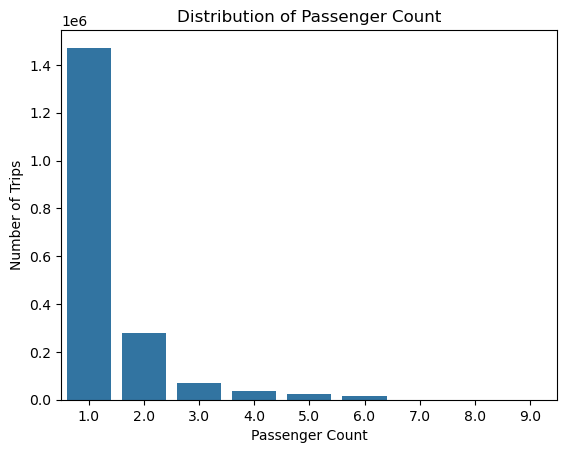

In [27]:
# From the above information we can take each variable one by one

# 1. passenger_count
print(f'Value count for passenger_count variable \n {taxi_df.passenger_count.value_counts()}')

passenger_counts = taxi_df['passenger_count'].value_counts().sort_index()

# We see that the passenger_count 8,9,7 are very less in number. They can be considered potential outliers.

# Plotting passenger_count
sns.barplot(x=passenger_counts.index, y=passenger_counts.values)
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.title('Distribution of Passenger Count')
plt.show()



Value count for trip_distance variable 
 trip_distance
0.00        37709
0.90        25783
1.00        25763
1.10        25438
0.80        25206
            ...  
43.33           1
44.94           1
31.53           1
41.62           1
20314.00        1
Name: count, Length: 4114, dtype: int64


Text(0.5, 0, 'Trip Distance (miles)')

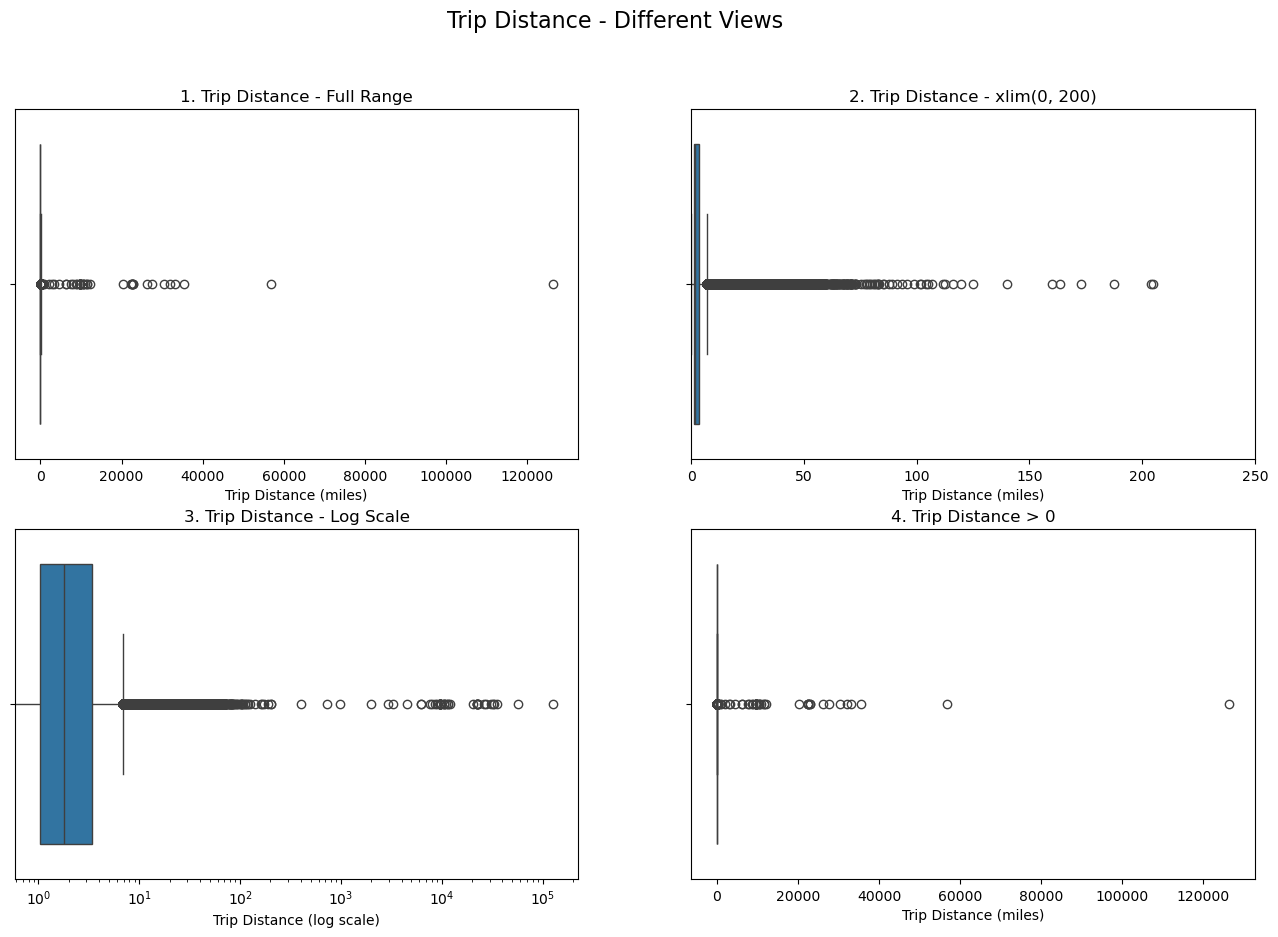

In [28]:
# 2. trip_distance

print(f'Value count for trip_distance variable \n {taxi_df.trip_distance.value_counts()}')


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.suptitle('Trip Distance - Different Views', fontsize=16)

# 1. Normal data (Full range)
sns.boxplot(x=taxi_df['trip_distance'], ax=axes[0, 0])
axes[0, 0].set_title('1. Trip Distance - Full Range')
axes[0, 0].set_xlabel('Trip Distance (miles)')

# 2. Limited x-axis (0 to 200 miles)
sns.boxplot(x=taxi_df['trip_distance'], ax=axes[0, 1])
axes[0, 1].set_xlim(0, 250)
axes[0, 1].set_title('2. Trip Distance - xlim(0, 200)')
axes[0, 1].set_xlabel('Trip Distance (miles)')

# 3. Log scale
sns.boxplot(x=taxi_df['trip_distance'], ax=axes[1, 0])
axes[1, 0].set_xscale('log')
axes[1, 0].set_title('3. Trip Distance - Log Scale')
axes[1, 0].set_xlabel('Trip Distance (log scale)')

# 4. Filtered: Trip Distance > 0
sns.boxplot(x=taxi_df[taxi_df['trip_distance'] > 0]['trip_distance'], ax=axes[1, 1])
axes[1, 1].set_title('4. Trip Distance > 0')
axes[1, 1].set_xlabel('Trip Distance (miles)')

# The following graphs shows 
# 1. Some trip distances exceed 120,000 miles, which is highly unrealistic
# 2. Most trips fall under 25 miles, with a few legitimate long-distance ones.
# 3. A few trips between 100–200 miles, which may be rare. From the boxplot-2 it looks like data more than 200 is potentially outlier
# 4. Distribution is heavily right-skewed, which shows unrealistic values, due to data entry errors

Va;ue count for fare_amount - 
 fare_amount
8.60     83816
9.30     82991
10.00    82709
7.90     81107
10.70    78622
         ...  
76.08        1
5.82         1
54.77        1
56.39        1
56.88        1
Name: count, Length: 7366, dtype: int64


Text(0.5, 0, 'Fare Amount ($)')

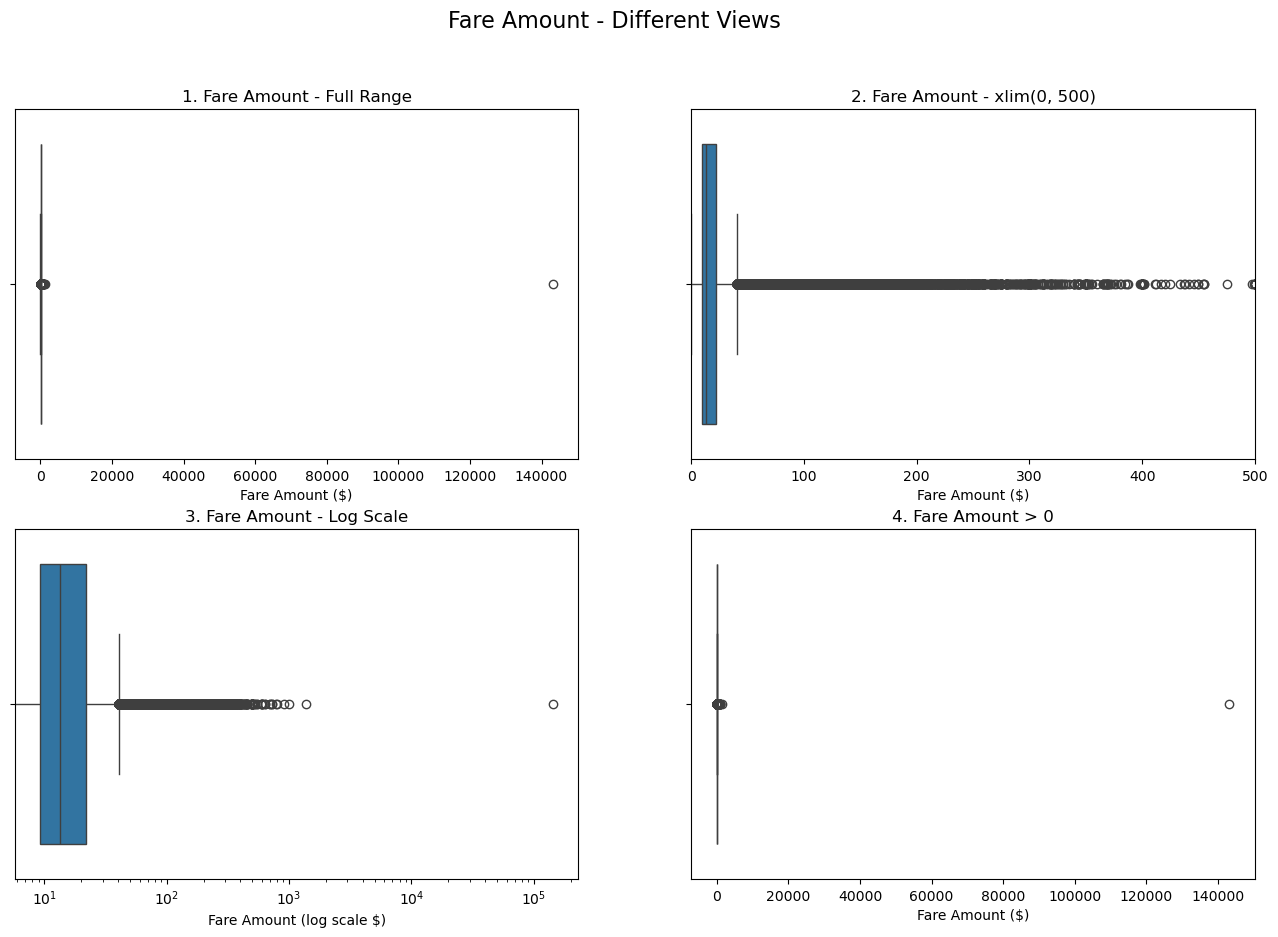

In [29]:

# 3. fare_amount

print(f'Va;ue count for fare_amount - \n {taxi_df.fare_amount.value_counts()}')


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.suptitle('Fare Amount - Different Views', fontsize=16)

# 1. Normal data (Full range)
sns.boxplot(x=taxi_df['fare_amount'], ax=axes[0, 0])
axes[0, 0].set_title('1. Fare Amount - Full Range')
axes[0, 0].set_xlabel('Fare Amount ($)')

# 2. Limited x-axis (0 to 200 miles)
sns.boxplot(x=taxi_df['fare_amount'], ax=axes[0, 1])
axes[0, 1].set_xlim(0, 500)
axes[0, 1].set_title('2. Fare Amount - xlim(0, 500)')
axes[0, 1].set_xlabel('Fare Amount ($)')

# 3. Log scale
sns.boxplot(x=taxi_df['fare_amount'], ax=axes[1, 0])
axes[1, 0].set_xscale('log')
axes[1, 0].set_title('3. Fare Amount - Log Scale')
axes[1, 0].set_xlabel('Fare Amount (log scale $)')

# 4. Filtered: Trip Distance > 0
sns.boxplot(x=taxi_df[taxi_df['fare_amount'] > 0]['fare_amount'], ax=axes[1, 1])
axes[1, 1].set_title('4. Fare Amount > 0')
axes[1, 1].set_xlabel('Fare Amount ($)')

# The following graphs shows 
# 1. A majority of the fare amounts are below $100, and many are clustered under $50.
# 2. There is at least one extreme outlier (≈ $140,000) which is far from the majority of data points.


Value count for fare_amount - 
 extra
0.00     756699
2.50     466592
1.00     363923
5.00     134226
3.50     107364
7.50      16267
6.00      15556
4.25       6373
9.25       6351
1.75       3356
3.75       2619
6.75       2418
2.75       2209
8.75       2132
10.25      1695
7.75       1464
1.25       1418
11.75      1331
2.25        882
6.25        840
10.00       568
9.75        554
7.25        484
11.25       411
8.50        367
3.20         45
3.00         35
2.00         26
0.50         22
5.25         22
4.75         11
0.75         11
4.50          9
3.25          8
1.50          8
2.45          6
2.72          5
0.70          5
12.50         3
7.00          3
14.25         3
3.05          2
0.25          2
6.80          2
0.19          1
0.01          1
5.30          1
11.00         1
0.03          1
4.05          1
1.26          1
1.05          1
8.20          1
2.20          1
20.80         1
13.75         1
Name: count, dtype: int64


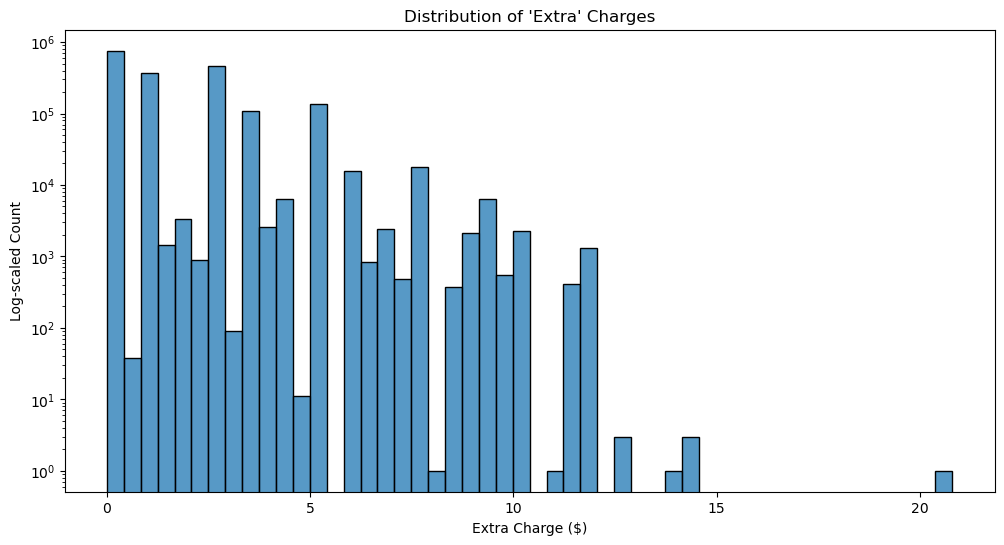

In [30]:
# 4. extra

print(f'Value count for fare_amount - \n {taxi_df.extra.value_counts()}')
plt.figure(figsize=(12,6))
sns.histplot(taxi_df['extra'], bins=50, log=True)  # log scale to handle rare values
plt.title("Distribution of 'Extra' Charges")
plt.xlabel("Extra Charge ($)")
plt.ylabel("Log-scaled Count")
plt.show()

# The following graphs shows 
# 1. A majority of the extra is zero.
# 2. From the log scale it is clear that most of the extra is charged between 0-5 $

Value count for total_amount - 
 total_amount
16.80     27036
12.60     24643
21.00     22634
18.00     14366
15.12     14332
          ...  
334.25        1
149.28        1
148.27        1
113.53        1
107.38        1
Name: count, Length: 14775, dtype: int64


Text(0.5, 0, 'Total Amount ($)')

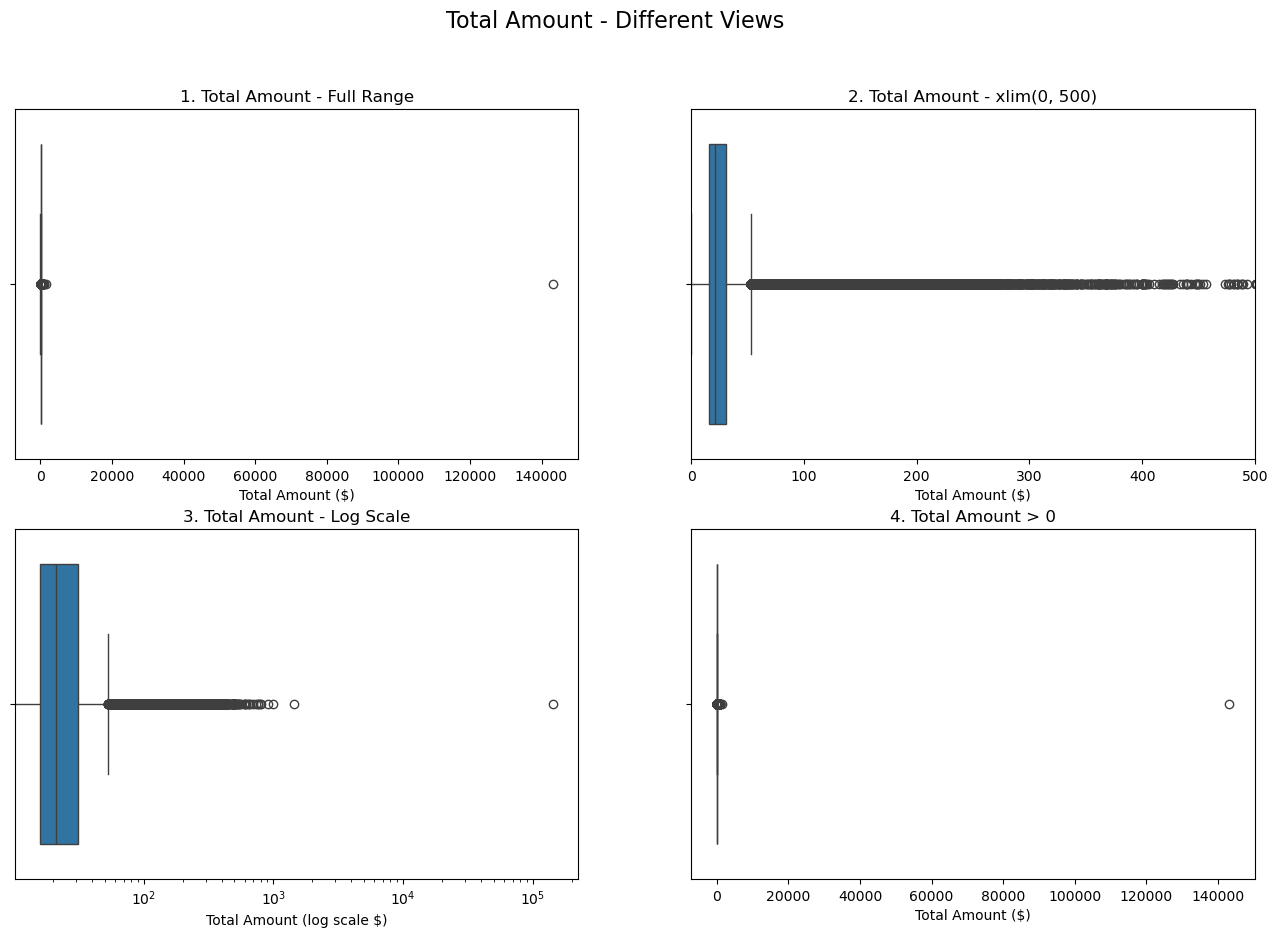

In [31]:
# 5. total_amount

print(f'Value count for total_amount - \n {taxi_df.total_amount.value_counts()}')


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.suptitle('Total Amount - Different Views', fontsize=16)

# 1. Normal data (Full range)
sns.boxplot(x=taxi_df['total_amount'], ax=axes[0, 0])
axes[0, 0].set_title('1. Total Amount - Full Range')
axes[0, 0].set_xlabel('Total Amount ($)')

# 2. Limited x-axis (0 to 200 miles)
sns.boxplot(x=taxi_df['total_amount'], ax=axes[0, 1])
axes[0, 1].set_xlim(0, 500)
axes[0, 1].set_title('2. Total Amount - xlim(0, 500)')
axes[0, 1].set_xlabel('Total Amount ($)')

# 3. Log scale
sns.boxplot(x=taxi_df['total_amount'], ax=axes[1, 0])
axes[1, 0].set_xscale('log')
axes[1, 0].set_title('3. Total Amount - Log Scale')
axes[1, 0].set_xlabel('Total Amount (log scale $)')

# 4. Filtered: Trip Distance > 0
sns.boxplot(x=taxi_df[taxi_df['total_amount'] > 0]['total_amount'], ax=axes[1, 1])
axes[1, 1].set_title('4. Total Amount > 0')
axes[1, 1].set_xlabel('Total Amount ($)')

# From the graph we can infer
# 1. Distribution is similar to fare amount. As it is one of the major factors effecting total amount


Value counts of Categorical variables
Column - VendorID
VendorID
2    1387974
1     507923
6        442
Name: count, dtype: int64
Column - RatecodeID
RatecodeID
1.0     1794169
2.0       71561
99.0      10477
5.0       10290
3.0        6122
4.0        3717
6.0           3
Name: count, dtype: int64
Column - store_and_fwd_flag
store_and_fwd_flag
N    1885091
Y      11248
Name: count, dtype: int64
Column - payment_type
payment_type
1    1492379
2     316388
0      64875
4      13672
3       9025
Name: count, dtype: int64


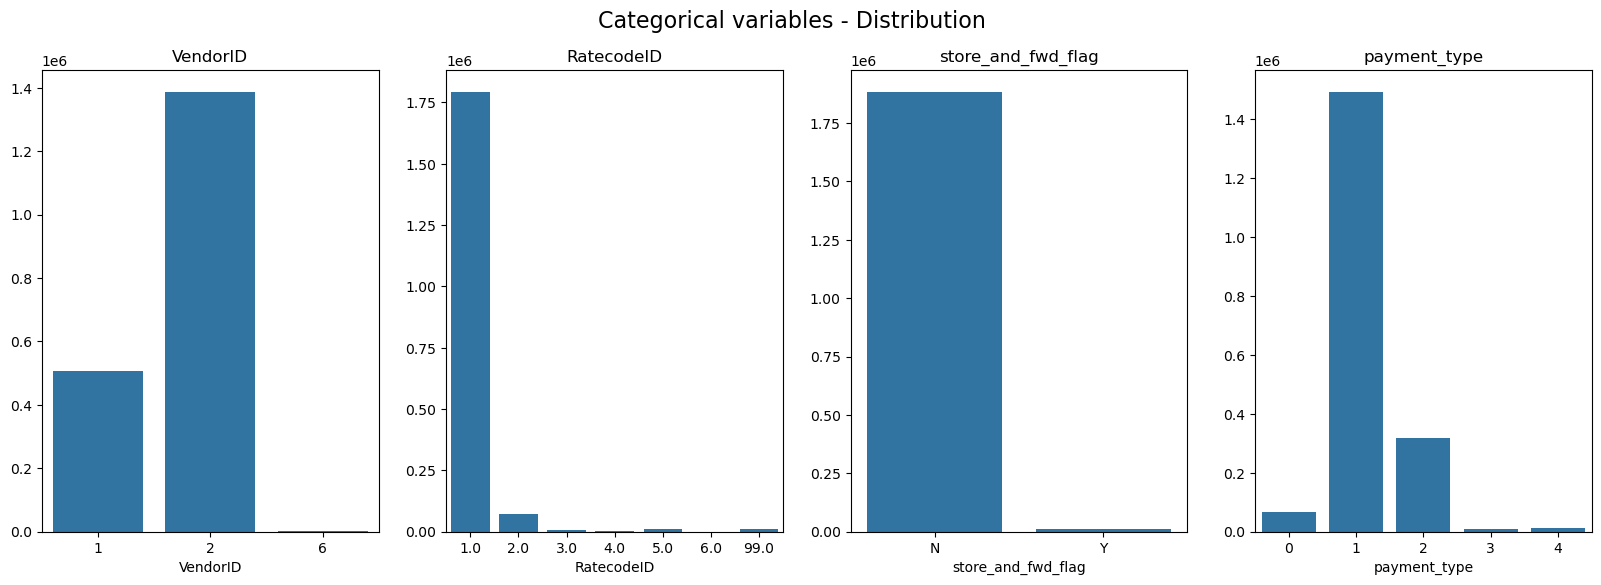

In [32]:
categorical_cols = [
    'VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type'
]

print(f'Value counts of Categorical variables')
for col in categorical_cols:
    print(f'Column - {col}')
    print(taxi_df[col].value_counts())


fig, axes = plt.subplots(1, 4, figsize=(20, 6))
plt.suptitle('Categorical variables - Distribution', fontsize=16)



for n,col in enumerate(categorical_cols):
    val_count = taxi_df[col].value_counts().sort_index()
    sns.barplot(x=val_count.index, y=val_count.values, ax=axes[n])
    axes[n].set_title(f'{col}')
    axes[n].set_xlabel(f'{col}')

# From the graphs
# 1. There are few VendorIDs which are 6, which seems to be incorrect.
# 2. Most trips are with RatecodID 1.0 but there are few with 99.0 which is invalid as per data dictionary
# 3. Payment_Type of 1 is mostly used for trips, however few are with 0 which is not valid.


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [33]:
# remove passenger_count > 6
print(f'Trips with passenger_count more than 6 - {(taxi_df.passenger_count>6).sum()}')
print(f'Removing these rows')
taxi_df = taxi_df[taxi_df.passenger_count<=6]
taxi_df.shape

Trips with passenger_count more than 6 - 22
Removing these rows


(1896317, 19)

In [34]:
# Continue with outlier handling

# Dropping Rows where trip_distance is 0 and fare_amount is more than 300.
taxi_df = taxi_df[~((taxi_df.trip_distance<=0) & (taxi_df.fare_amount>300))]

# Dropping Rows where trip_distance and fare_amount is zero but PUlocationID and DOLocationID is different
taxi_df = taxi_df[~((taxi_df.trip_distance==0) & (taxi_df.fare_amount==0) & (taxi_df.PULocationID != taxi_df.DOLocationID))]

# Dropping Trips which are more than 400 miles
taxi_df = taxi_df[~(taxi_df.trip_distance>400)]

# Drop rows with payment_type 0
taxi_df = taxi_df[~(taxi_df.payment_type==0)]

In [35]:
# Reviewing Rows with RatecodeID as 99
print(f'Number of trips with RatecodeID as 99 - {(taxi_df.RatecodeID==99).sum()}')
print(f'Checking overall values of numerical fields for these rows')
taxi_df[(taxi_df.RatecodeID==99)][numeric_cols].describe()

# As we see that the values for all other numerical variables are within close range so we can conclude that there is an mistake in entry and we can impute mode value in these rows.
mode = taxi_df.RatecodeID.mode()[0]
print(f'Mode for RatecodeID {mode}')

taxi_df['RatecodeID'] = taxi_df['RatecodeID'].replace(99, mode)
print(f'Value count for RatecodeID - \n {taxi_df.RatecodeID.value_counts()}')


Number of trips with RatecodeID as 99 - 10467
Checking overall values of numerical fields for these rows
Mode for RatecodeID 1.0
Value count for RatecodeID - 
 RatecodeID
1.0    1739712
2.0      71561
5.0      10214
3.0       6122
4.0       3717
6.0          3
Name: count, dtype: int64


In [36]:
# Reviewing rows with fare_amount more than $500
print(f'Rows with fare_amount more than $500 - {(taxi_df.fare_amount>500).sum()}')
taxi_df[(taxi_df.fare_amount>500)]
# Dropping these rows
taxi_df = taxi_df[~(taxi_df.fare_amount>500)]

Rows with fare_amount more than $500 - 16


In [37]:
taxi_df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,1.831313e+06,1831313,1831313,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06,1.831313e+06
mean,1.736403e+00,2023-07-01 20:45:00.328169472,2023-07-01 21:02:21.957683712,1.385287e+00,3.443089e+00,1.074144e+00,1.654478e+02,1.643246e+02,1.204959e+00,1.973070e+01,1.638454e+00,4.953685e-01,3.573628e+00,5.955647e-01,9.993285e-01,2.885463e+01,2.307903e+00,1.429147e-01
min,1.000000e+00,2001-01-01 00:06:49,2001-01-01 15:42:11,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-01 20:07:18,2023-04-01 20:22:03,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-26 08:15:19,2023-06-26 08:30:51,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-05 19:15:21,2023-10-05 19:32:27,1.000000e+00,3.370000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.070000e+01,2.500000e+00,0.000000e+00
max,2.000000e+00,2024-01-01 00:01:34,2024-01-01 20:50:55,6.000000e+00,1.873500e+02,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,5.000000e+02,1.425000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,5.357500e+02,2.500000e+00,1.750000e+00
std,4.405832e-01,NaN,NaN,8.764298e-01,4.532135e+00,3.929503e-01,6.367209e+01,6.973908e+01,4.664178e-01,1.815522e+01,1.836190e+00,4.821445e-02,4.070876e+00,2.181877e+00,2.401852e-02,2.279034e+01,6.658383e-01,4.648628e-01


In [38]:
# Do any columns need standardising?

# There does not seem to be any requirement of standardization.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [39]:
taxi_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [40]:
categorical_cols = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count','RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',]

numeric_cols = ['trip_distance','fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee'
]


print(f'Categorical Columns - {categorical_cols}')
print(f'Numerical Columns - {numeric_cols}')

Categorical Columns - ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type']
Numerical Columns - ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


##### Temporal Analysis

In [41]:
# Deriving pickup_hour, dropff_hour and trip_duration from the dataframe
taxi_df['pickup_hour'] = taxi_df.tpep_pickup_datetime.dt.hour
taxi_df['dropff_hour'] = taxi_df.tpep_dropoff_datetime.dt.hour
taxi_df['trip_duration'] = (taxi_df['tpep_dropoff_datetime'] - taxi_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Deriving column part_of_day that is morning, afternoon, evening, night on the basis of pickup_hour
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'      
    elif 12 <= hour < 17:
        return 'Afternoon'    
    elif 17 <= hour < 21:
        return 'Evening'      
    else:
        return 'Night'        

taxi_df['part_of_day'] = taxi_df['pickup_hour'].apply(part_of_day)

# Deriving column season that is winter, summer, spring, fall from tpep_pickup_datetime

def season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

taxi_df['season'] = taxi_df['tpep_pickup_datetime'].apply(season)

# Deriving column pickup_day for day patterns

taxi_df['pickup_day'] = taxi_df['tpep_pickup_datetime'].dt.day_name()

# Deriving column is_weekend for weekday vs weekend analysis
taxi_df['is_weekend'] = taxi_df['pickup_day'].isin(['Saturday', 'Sunday'])

# Deriving column pickup_month for analysis on monthly trips

taxi_df['pickup_month'] = taxi_df['tpep_pickup_datetime'].dt.strftime('%b')

In [42]:
# There are data which is not of 2023. 

print(f'Value count of trips with respect of pickup year \n {taxi_df.tpep_pickup_datetime.dt.year.value_counts()}')
print(f'Dropping rows which are not part of year 2023')
taxi_df = taxi_df[taxi_df.tpep_pickup_datetime.dt.year == 2023]


Value count of trips with respect of pickup year 
 tpep_pickup_datetime
2023    1831305
2001          2
2022          2
2024          1
2002          1
2008          1
2009          1
Name: count, dtype: int64
Dropping rows which are not part of year 2023


In [43]:
# Deriving Categorical and Continuous variables
categorical_cols = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'RatecodeID', 
                    'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'pickup_hour'
                    'part_of_day', 'season', 'pickup_day', 'is_weekend', 'pickup_month']

numeric_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'trip_duration']

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

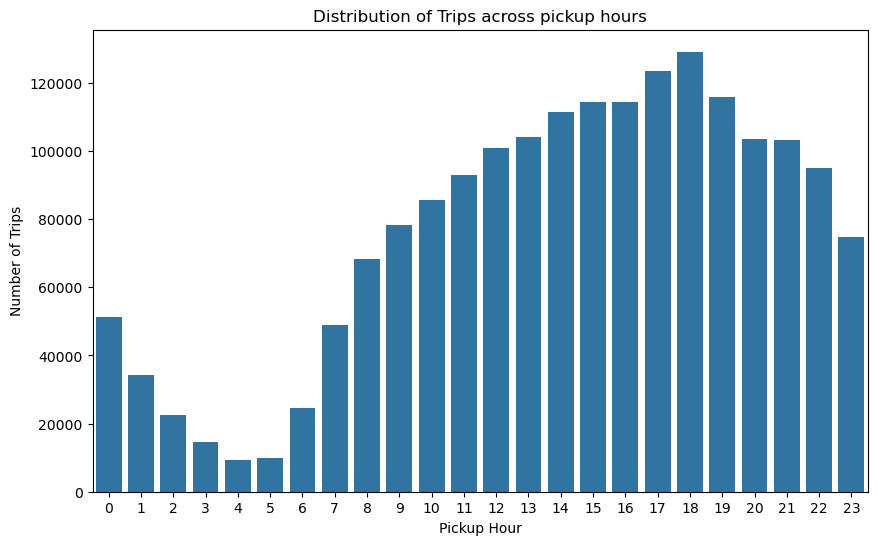

In [44]:
# Find and show the hourly trends in taxi pickups

val_count = taxi_df.pickup_hour.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=val_count.index, y=val_count.values)
plt.title('Distribution of Trips across pickup hours')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.show()

Analysis of Number of Trips across different times of day
1. The peak hours for Taxis is between 3pm - 7pm.
2. The slump hours are between 3am - 5am
3. Heavy spike is seen between 6am - 9am. There after there is a gradual increase in taxi demand.
4. After spiking at 6pm, there is a gradual decrease, however the maximum amount of decrease is we see between 11pm - 3am

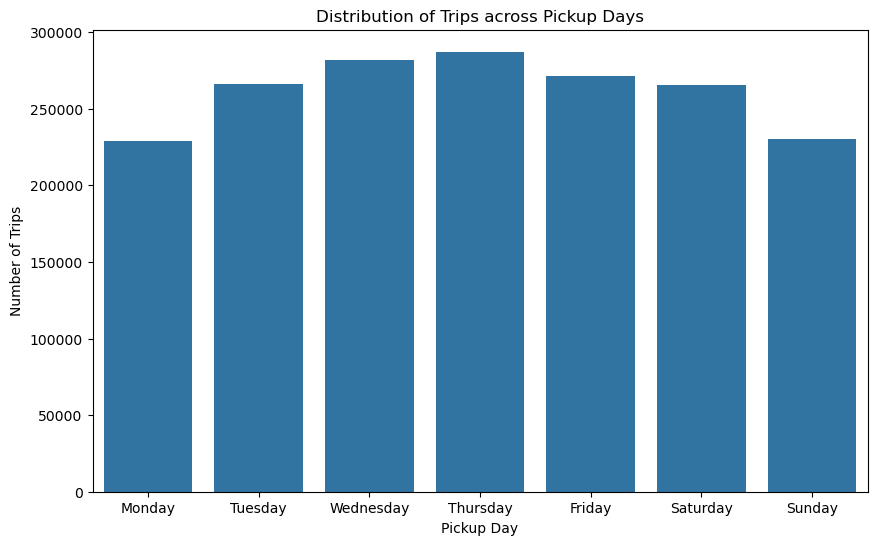

In [45]:
# Find and show the daily trends in taxi pickups (days of the week)

val_count = taxi_df.pickup_day.value_counts()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.barplot(x=val_count.index, y=val_count.values, order=ordered_days)
plt.title('Distribution of Trips across Pickup Days')
plt.xlabel('Pickup Day')
plt.ylabel('Number of Trips')
plt.show()


Analysis of Number of Trips across different days of week
1. There is a gradual increase from Monday to Thursday and the there is a decline in demand.
2. Wednesday and Thursday have highest number of trips during the weekday.
3. Even though Saturday is a weekend but still we see demand is comparable with weekdays, most probably due to people going out after busy week.

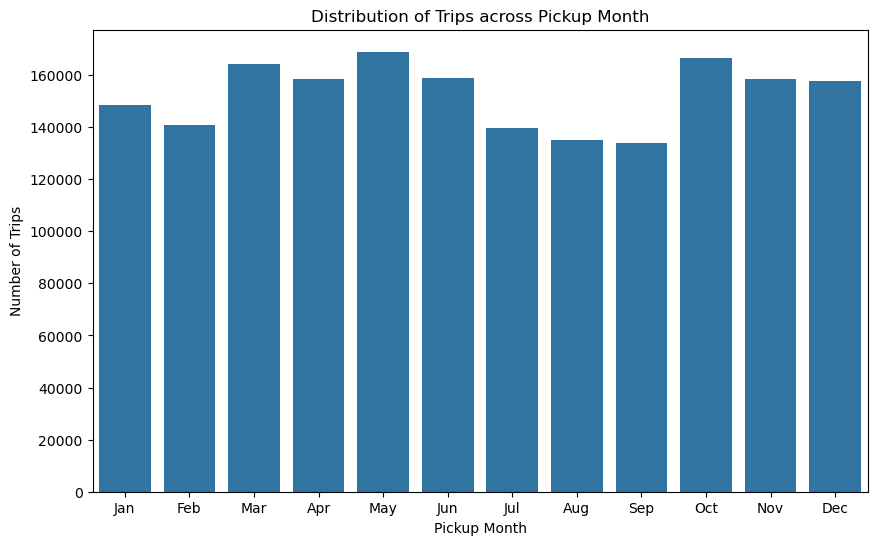

In [46]:
# Show the monthly trends in pickups

val_count = taxi_df.pickup_month.value_counts()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
sns.barplot(x=val_count.index, y=val_count.values, order=month_order)
plt.title('Distribution of Trips across Pickup Month')
plt.xlabel('Pickup Month')
plt.ylabel('Number of Trips')
plt.show()

Analysis of Number of Trips across Months
1. There is a spike in demand during the months March, April, May. This is spring and a tourist season.
2. There is a slump in July, August and Sepetember
3. There is a sudden spike in demand for the month of october. During the Fall, there is a influx of tourist.

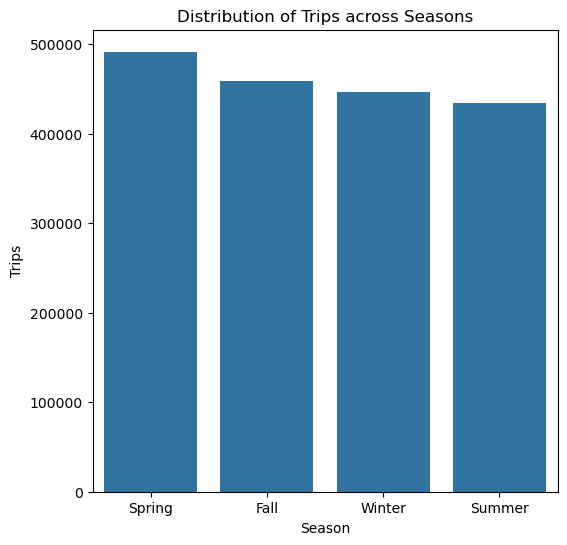

In [47]:
# Plotting trip trends with season

val_count = taxi_df.season.value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=val_count.index, y=val_count.values)
plt.title('Distribution of Trips across Seasons')
plt.xlabel('Season')
plt.ylabel('Trips')
plt.show()

Analysis of Number of Trips across Season
1. During the Spring there is a increase in demand. due to people tend to move out after the winter season
2. The demand during Fall, Winter and Summer is comparable.

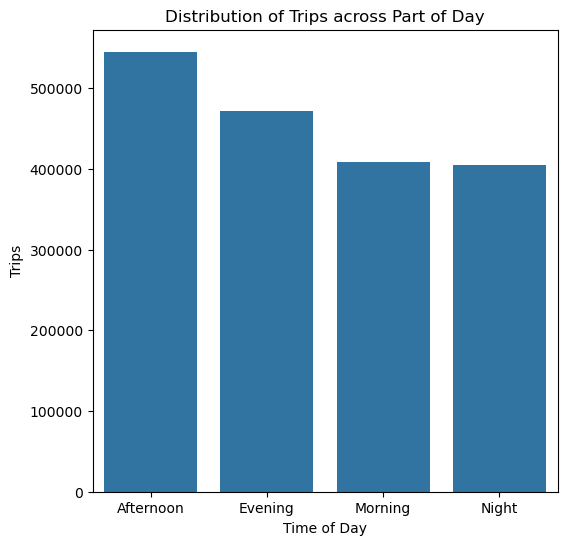

In [48]:
# Plotting trip trends with part of day

val_count = taxi_df.part_of_day.value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=val_count.index, y=val_count.values)
plt.title('Distribution of Trips across Part of Day')
plt.xlabel('Time of Day')
plt.ylabel('Trips')
plt.show()

Analysis of Demand across Time of day
1. There is heavy demand during Afternoon hours
2. Demand during Morning and Night hours is comparable

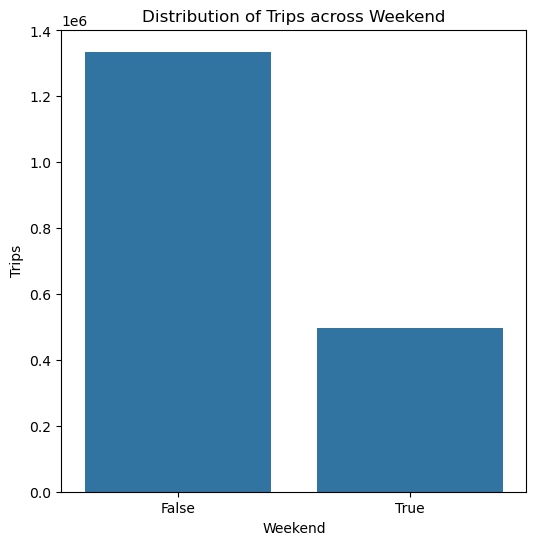

In [49]:
# Plotting trip trends with weekend

val_count = taxi_df.is_weekend.value_counts()

plt.figure(figsize=(6, 6))
sns.barplot(x=val_count.index, y=val_count.values)
plt.title('Distribution of Trips across Weekend')
plt.xlabel('Weekend')
plt.ylabel('Trips')
plt.show()

Analysis of Trips during Weekends
1. There is a huge difference in demand during weekdays vs weekends.
2. The Demand is more than double on weekdays.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [50]:
# Identifying number of rows which are zero or negative in columns related to numerical values.
# Specially trip_distance, fare_amount, total_amount, tip_amount.
# Other columns are expected to have 0 since there might be situation where the relevant charge/tax may not be appplicable.

col_list = ['trip_distance', 'fare_amount', 'tip_amount','total_amount', 'trip_duration']

for col in col_list:
    print(f'Number of rows in {col} where value is zero - {(taxi_df[col]<=0).sum()}')

# We see that 
# 1. There are hardly 500 rows which have fare_amount as zero. So these values can be discarded.
# 2. There are more than 400k rows which have tip_amount as 0. This is expected as there might be riders who may not have given any tip.
# 3. The number of rows with trip_distance as 0 are 22k. This may be due to error in sensor or manual entry. Analyzing more.
# 4. Rows with trip_duration less than 0 does not make sense. So they will be dropped.

Number of rows in trip_distance where value is zero - 22899
Number of rows in fare_amount where value is zero - 500
Number of rows in tip_amount where value is zero - 410135
Number of rows in total_amount where value is zero - 252
Number of rows in trip_duration where value is zero - 681


In [51]:
# Checking the values of other numerical fields when trip_distance is zero.
taxi_df[taxi_df.trip_distance<=0][col_list].describe()


,trip_distance,fare_amount,tip_amount,total_amount,trip_duration
count,22899.0,22899.000000,22899.000000,22899.000000,22899.000000
mean,0.0,27.961868,3.052281,34.983492,10.098902
std,0.0,34.672281,7.522252,38.651934,67.998069
min,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,3.000000,0.000000,7.250000,0.150000
50%,0.0,12.800000,0.000000,19.000000,0.483333
75%,0.0,42.700000,2.900000,50.700000,9.733333
max,0.0,300.000000,201.000000,402.000000,6266.383333


In [52]:
# Analyse the above parameters

taxi_df[(taxi_df.trip_distance<=0) & (taxi_df.PULocationID != taxi_df.DOLocationID)]

# There are 7648 rows which have Pickup zone and Drop zone different, however the trip_distance is zero. These values seem to be fictitious and can be dropped.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,Airport_fee,pickup_hour,dropff_hour,trip_duration,part_of_day,season,pickup_day,is_weekend,pickup_month
441,1,2023-12-01 23:25:26,2023-12-01 23:28:16,1.0,0.0,1.0,N,235,136,3,...,0.0,0.0,23,23,2.833333,Night,Winter,Friday,False,Dec
579,1,2023-12-01 01:08:05,2023-12-01 01:14:02,1.0,0.0,1.0,N,140,262,1,...,2.5,0.0,1,1,5.950000,Night,Winter,Friday,False,Dec
691,2,2023-12-01 22:53:53,2023-12-01 23:11:07,2.0,0.0,1.0,N,142,170,1,...,2.5,0.0,22,23,17.233333,Night,Winter,Friday,False,Dec
902,1,2023-12-01 22:22:36,2023-12-01 22:22:36,2.0,0.0,1.0,Y,186,264,2,...,2.5,0.0,22,22,0.000000,Night,Winter,Friday,False,Dec
1031,1,2023-12-01 02:03:25,2023-12-01 02:09:39,1.0,0.0,1.0,N,163,141,1,...,2.5,0.0,2,2,6.233333,Night,Winter,Friday,False,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895122,1,2023-06-30 13:42:02,2023-06-30 14:14:47,1.0,0.0,1.0,N,74,95,1,...,0.0,0.0,13,14,32.750000,Afternoon,Summer,Friday,False,Jun
1895151,2,2023-06-30 13:40:17,2023-06-30 13:40:19,1.0,0.0,1.0,N,48,264,2,...,0.0,0.0,13,13,0.033333,Afternoon,Summer,Friday,False,Jun
1895181,1,2023-06-30 13:46:10,2023-06-30 14:01:18,1.0,0.0,1.0,N,218,265,1,...,0.0,0.0,13,14,15.133333,Afternoon,Summer,Friday,False,Jun
1895403,1,2023-06-30 14:10:53,2023-06-30 15:19:14,1.0,0.0,1.0,N,75,219,1,...,0.0,0.0,14,15,68.350000,Afternoon,Summer,Friday,False,Jun


In [53]:

# From the analysis we can conclude
# 1. Drop the rows with fare_amount as zero
# 2. Drop rows which have trip_distance as zero but different PULocationID and DOLocationID
# 3. Drop rows the total_amount is zero.
# 4. Drop rows with trip_duration is less than or equal to zero


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [54]:
# Create a df with non zero entries for the selected parameters.

# Dropping rows with fare_amount is less than or equal to zero
taxi_wo_zero_df = taxi_df.copy()
taxi_wo_zero_df = taxi_wo_zero_df[~(taxi_wo_zero_df.fare_amount <= 0)]

# Drop rows which have trip_distance as zero but different PULocationID and DOLocationID
taxi_wo_zero_df = taxi_wo_zero_df[~((taxi_wo_zero_df.trip_distance<=0) & (taxi_wo_zero_df.PULocationID != taxi_wo_zero_df.DOLocationID))]

# Drop rows the total_amount is zero.
taxi_wo_zero_df = taxi_wo_zero_df[~(taxi_wo_zero_df.total_amount <= 0)]

# Drop rows with trip_duration is less than zero
taxi_wo_zero_df = taxi_wo_zero_df[~(taxi_wo_zero_df.trip_duration <= 0)]

# Drop rows with tip_amount is zero
# taxi_wo_zero_df = taxi_wo_zero_df[~(taxi_wo_zero_df.tip_amount <= 0)]
# Not dropping the rows with tip_amount as zero as there are legitimate customers who may not want to pay tip.


In [55]:
taxi_wo_zero_df.shape

(1823005, 27)

In [56]:
taxi_wo_zero_df[numeric_cols].describe()

,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration
count,1.823005e+06,1.823005e+06,1.823005e+06,1.823005e+06,1.823005e+06,1.823005e+06,1.823005e+06,1.823005e+06,1.823005e+06,1.823005e+06,1.823005e+06
mean,3.457764e+00,1.970941e+01,1.641790e+00,4.956399e-01,3.580878e+00,5.926924e-01,9.996494e-01,2.884571e+01,2.312742e+00,1.432352e-01,1.733977e+01
std,4.534898e+00,1.812226e+01,1.836703e+00,4.678129e-02,4.063888e+00,2.176660e+00,1.605180e-02,2.277197e+01,6.580872e-01,4.653386e-01,4.147355e+01
min,0.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.010000e+00,0.000000e+00,0.000000e+00,1.666667e-02
25%,1.060000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00,7.600000e+00
50%,1.800000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00,1.253333e+01
75%,3.390000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.065000e+01,2.500000e+00,0.000000e+00,2.048333e+01
max,1.873500e+02,5.000000e+02,1.425000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,5.357500e+02,2.500000e+00,1.750000e+00,6.266383e+03


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [57]:
# Group data by month and analyse monthly revenue

taxi_wo_zero_df.groupby('pickup_month')['total_amount'].sum()

pickup_month
Apr    4516304.27
Aug    3924936.60
Dec    4581859.89
Feb    3810548.57
Jan    4033152.43
Jul    4028662.03
Jun    4631671.96
Mar    4597193.25
May    4921184.05
Nov    4594160.53
Oct    4937551.45
Sep    4008655.55
Name: total_amount, dtype: float64

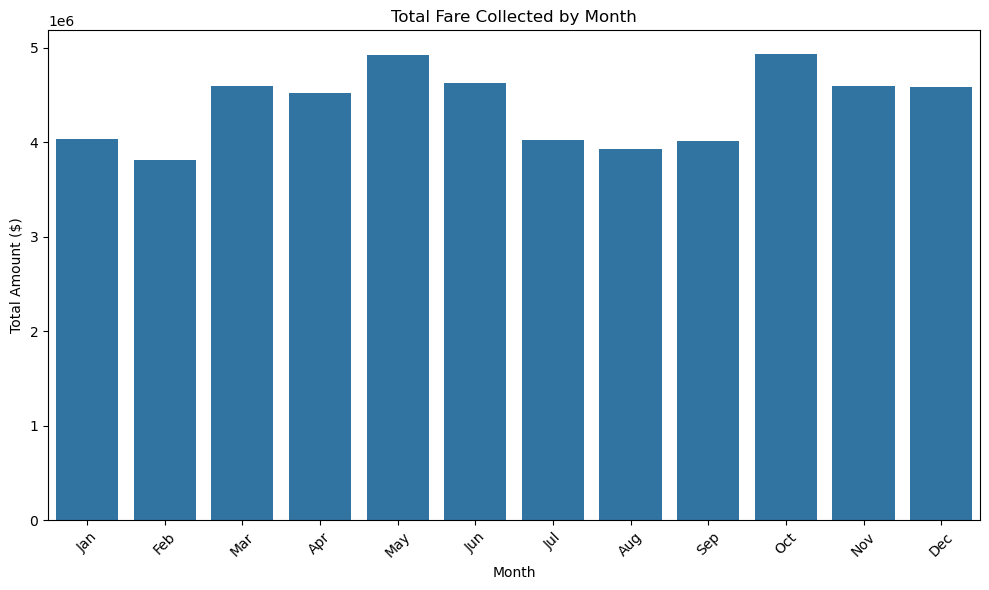

In [58]:
monthly_total_amt = taxi_wo_zero_df.groupby('pickup_month')['total_amount'].sum().reset_index()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_total_amt, x='pickup_month', y='total_amount', order=month_order)
plt.title('Total Fare Collected by Month')
plt.ylabel('Total Amount ($)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis of Total Amount across Months
1. The revenue collected during the months of May and October are highest. Amount is just under $5M
2. Lowest revenue is generated in month of Feb. Amount generated is less than $4M.
3. Amount generated during remaining months vary between ~$4.5M - ~$4.7M
4. These months Mar, Apr, Jun, Jul, Aug, Sep can be considered for scaleup to reduce the gap in revenue.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [59]:
# Calculate proportion of each quarter

# We create a new column quarter and use tpep_pickup_datetime as it's alreadt in datetime format

taxi_wo_zero_df['quarter'] = taxi_wo_zero_df['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_total = taxi_wo_zero_df.groupby('quarter')['total_amount'].sum().reset_index()

total_fare = quarterly_total['total_amount'].sum()

quarterly_total['proportion_percent'] = round(quarterly_total['total_amount'] * 100 / total_fare, 2)
print(quarterly_total)

  quarter  total_amount  proportion_percent
0  2023Q1   12440894.25               23.66
1  2023Q2   14069160.28               26.75
2  2023Q3   11962254.18               22.75
3  2023Q4   14113571.87               26.84


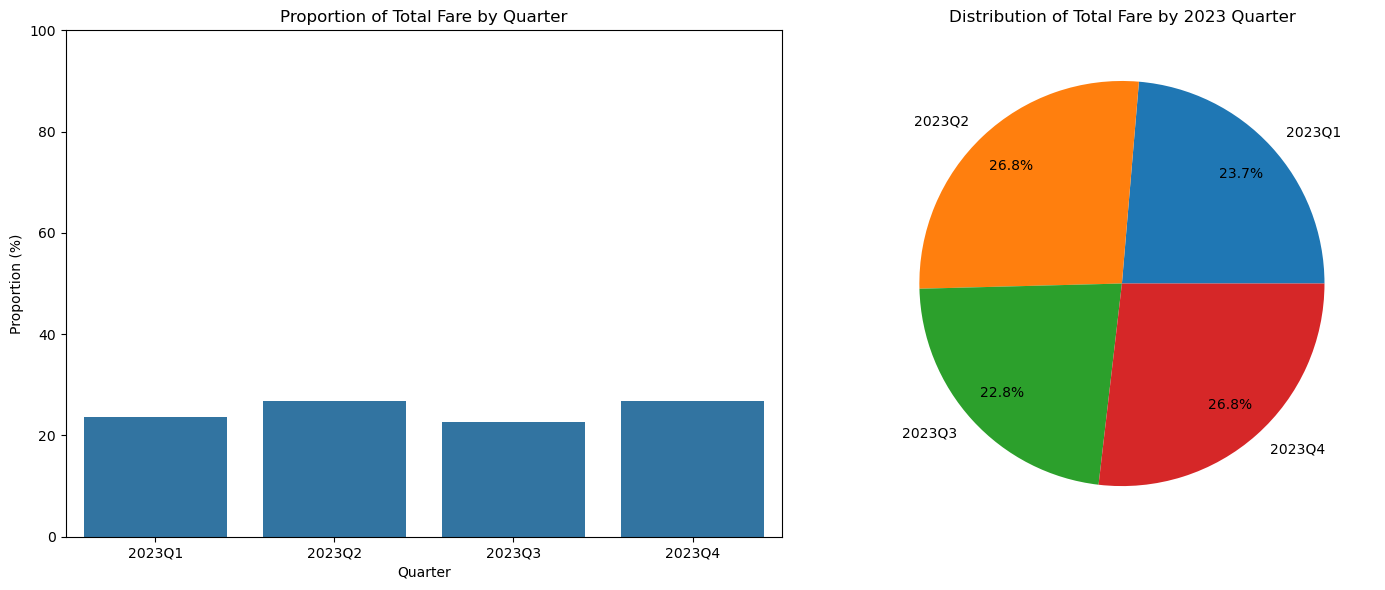

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=quarterly_total, x='quarter', y='proportion_percent', ax=axes[0])
axes[0].set_title('Proportion of Total Fare by Quarter')
axes[0].set_ylabel('Proportion (%)')
axes[0].set_xlabel('Quarter')
axes[0].set_ylim(0, 100)


axes[1].pie(
    quarterly_total['proportion_percent'],
    labels=quarterly_total['quarter'],
    autopct='%1.1f%%',
    labeldistance=1.1,
    pctdistance=0.8
)
axes[1].set_title('Distribution of Total Fare by 2023 Quarter')


plt.tight_layout()
plt.show()

Quarterly analysis of Total Amount
1. Q2 and Q4 have higher proportion in revenue ~26.8%. This is due to Spring and Fall time period.
2. Q1 and Q3 are very close with 22.8 and 23.7, a difference of just one percent.
3. In Q4, Cold weather may suppress demand slightly, but still better than the summer quarter

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [61]:
# Correlation matrix
taxi_wo_zero_df[taxi_wo_zero_df.trip_distance>0][['trip_distance', 'fare_amount']].corr()

,trip_distance,fare_amount
trip_distance,1.000000,0.945084
fare_amount,0.945084,1.000000


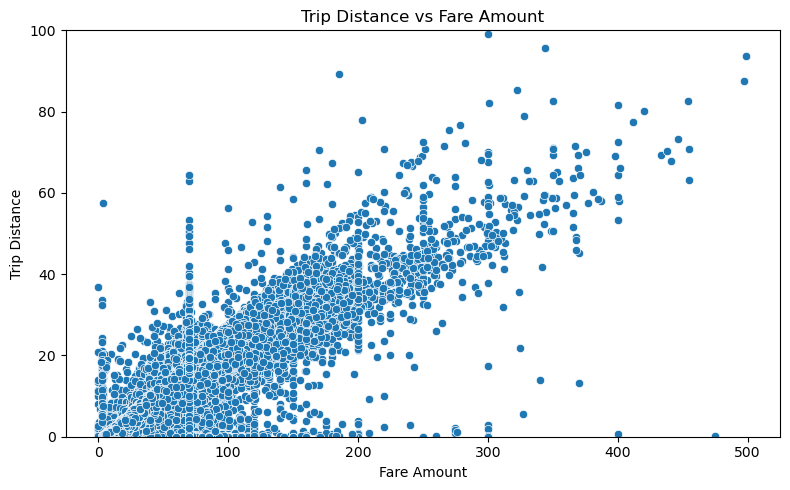

In [62]:
# Show how trip fare is affected by distance

plt.figure(figsize=(8, 5))
sns.scatterplot(data=taxi_wo_zero_df[taxi_wo_zero_df.trip_distance>0][['trip_distance', 'fare_amount']], x='fare_amount', y='trip_distance')
plt.title('Trip Distance vs Fare Amount')
plt.ylabel('Trip Distance')
plt.xlabel('Fare Amount')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# We see that the variables Trip Distance and Fare Amount have strong positive correlation. This is also validated by the correlation matrix

Analysis of Fare Amount vs Trip Distance
1. There is strong positive correlation between Fare Amount and Trip Distance
2. Between 0 - 30 miles there is high variance in fare amount. This suggests some short rides are charged higher.
3. There can be congestion issues due to which trips is less distance are charged more.


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correletaion Matrix - 
                trip_duration  fare_amount
trip_duration       1.000000     0.266243
fare_amount         0.266243     1.000000


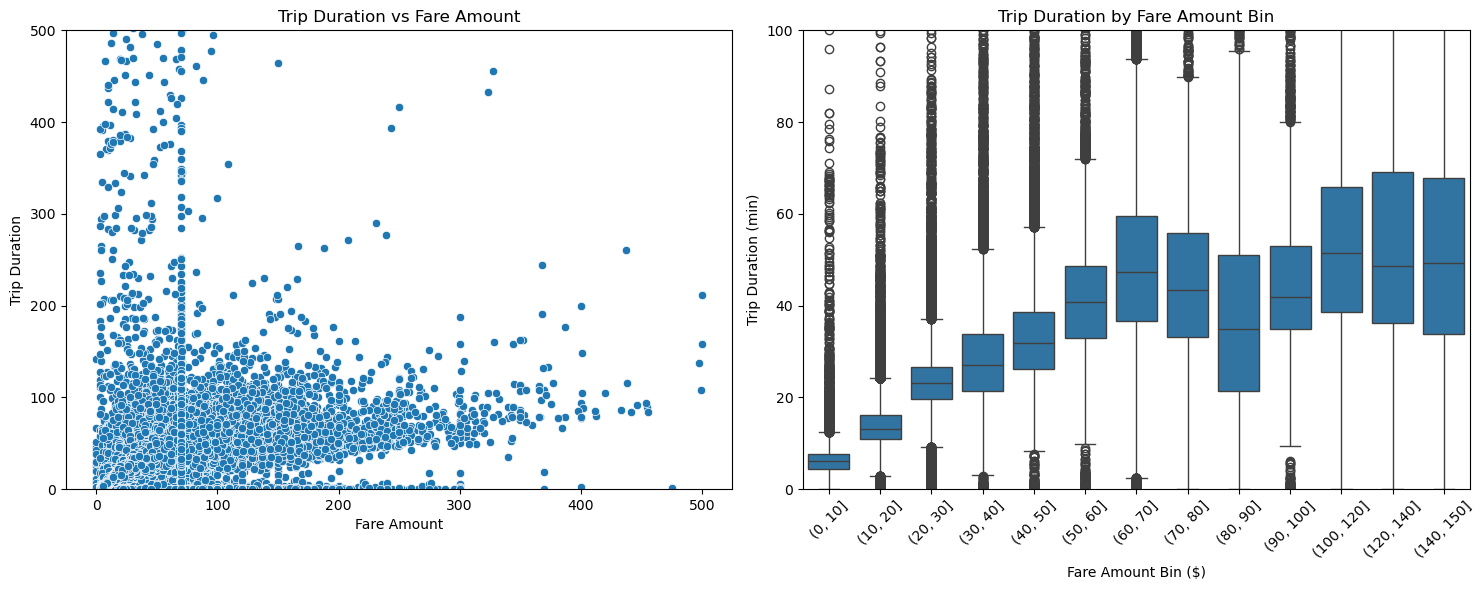

In [63]:
# Show relationship between fare amount and trip duration

print(f"Correletaion Matrix - \n {taxi_wo_zero_df[['trip_duration', 'fare_amount']].corr()}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(data=taxi_wo_zero_df, x='fare_amount', y='trip_duration', ax=axes[0])
axes[0].set_title('Trip Duration vs Fare Amount')
axes[0].set_ylabel('Trip Duration')
axes[0].set_xlabel('Fare Amount')
axes[0].set_ylim(0,500)

taxi_wo_zero_df['fare_bin'] = pd.cut(taxi_wo_zero_df['fare_amount'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 150], right=True) # Includes values more than 150 in last bucket 140-150
sns.boxplot(x='fare_bin', y='trip_duration', data=taxi_wo_zero_df, ax=axes[1])
axes[1].set_xlabel('Fare Amount Bin ($)')
axes[1].set_ylabel('Trip Duration (min)')
axes[1].set_title('Trip Duration by Fare Amount Bin')
axes[1].set_ylim(0,100)
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

Analysis between Trip Duration and Fare Amount
1. From correlation matrix we can see there is a moderate positive correlation between these two variables.
2. Low fare(<$100) trips are taking longer duration. This may be due to congestion, idle time, slow driving.
3. Higher fare (> $200) trips take shorter durations, this probably most of the rides are in freeways or interstate.
4. There are high number of outliers in all the bins, there it increases variance in the data.


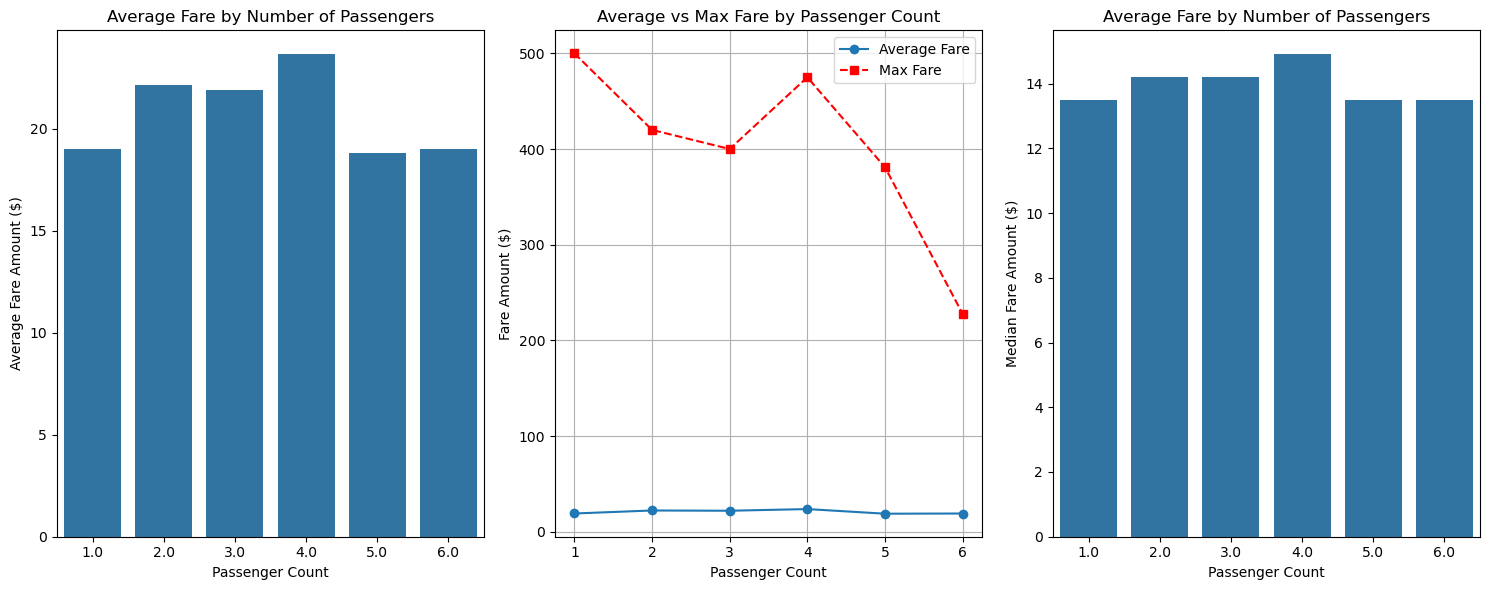

In [64]:
# Show relationship between fare and number of passengers

fare_stats = taxi_wo_zero_df.groupby('passenger_count')['fare_amount'].agg(['mean', 'max', 'median']).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.barplot(x='passenger_count', y='mean', data=fare_stats, ax=axes[0])
axes[0].set_xlabel('Passenger Count')
axes[0].set_ylabel('Average Fare Amount ($)')
axes[0].set_title('Average Fare by Number of Passengers')

axes[1].plot(fare_stats['passenger_count'], fare_stats['mean'], marker='o', label='Average Fare')
axes[1].plot(fare_stats['passenger_count'], fare_stats['max'], marker='s', label='Max Fare', linestyle='--', color='red')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Fare Amount ($)')
axes[1].set_title('Average vs Max Fare by Passenger Count')
axes[1].legend()
axes[1].grid(True)

sns.barplot(x='passenger_count', y='median', data=fare_stats, ax=axes[2])
axes[2].set_xlabel('Passenger Count')
axes[2].set_ylabel('Median Fare Amount ($)')
axes[2].set_title('Average Fare by Number of Passengers')

plt.tight_layout()
plt.show()

Analysis of Average Fare amount across Passenger count
1. The average fare for solo travellers is quite high.
2. There is a spike in average fare for passenger count 4 and 2 indicating that family and couple travellers tend to have costlier trips.
3. There is shar decline in max fares when passenger count is 5 and 6.
4. Average fare remains fairly stable across all groups (ranging $18–$23), with only minor variance.
5. The max fare amount is high in passnger count 1 which might push the average amount to higher side.
6. Graph for median shows similar trend as average but the variance is reduced further.

Correletaion Matrix - 
                tip_amount  trip_distance
tip_amount        1.00000        0.57554
trip_distance     0.57554        1.00000


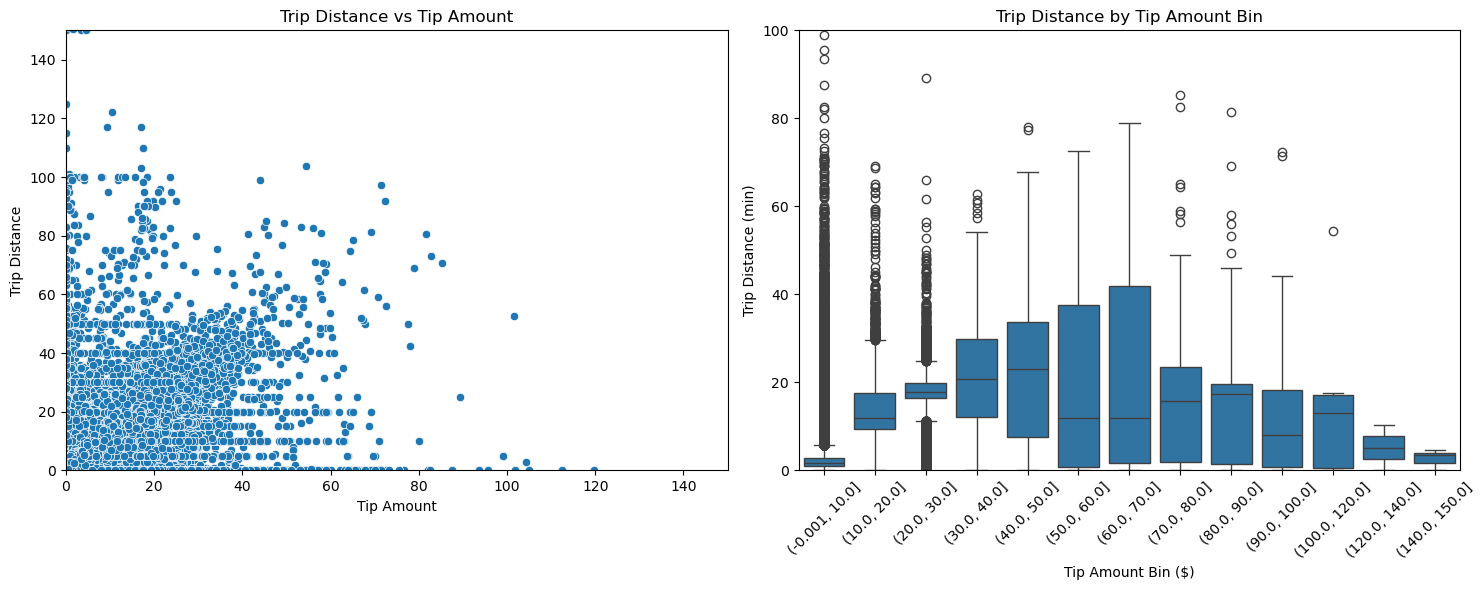

In [65]:
# Show relationship between tip and trip distance

print(f"Correletaion Matrix - \n {taxi_wo_zero_df[['tip_amount', 'trip_distance']].corr()}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(data=taxi_wo_zero_df, x='trip_distance', y='tip_amount', ax=axes[0])
axes[0].set_title('Trip Distance vs Tip Amount')
axes[0].set_ylabel('Trip Distance')
axes[0].set_xlabel('Tip Amount')
axes[0].set_ylim(0,150)
axes[0].set_xlim(0,150)

taxi_wo_zero_df['tip_bin'] = pd.cut(taxi_wo_zero_df['tip_amount'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 150], include_lowest=True)
sns.boxplot(x='tip_bin', y='trip_distance', data=taxi_wo_zero_df, ax=axes[1])
axes[1].set_xlabel('Tip Amount Bin ($)')
axes[1].set_ylabel('Trip Distance (min)')
axes[1].set_title('Trip Distance by Tip Amount Bin')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0,100)


plt.tight_layout()
plt.show()

Analysis of Trip Distance and Tip Amount
1. There is slightly positive correlation between these two variables.
2. With longer trip durations there is a possibility of higher tip amount, however there is a good amount of variability.
3. Most of the data is concentrated within $40 and 40 miles.
4. There are lot of outliers for bin of 0-10.
5. For lower tip amount bins, the median trip distance is relatively low, and the interquartile range (IQR) is tighter, indicating less variability in trip distances for these tip amounts.
6. As tip amounts increase (40.0, 50.0) to (70.0, 80.0), the median trip distance generally rises, and the boxes (representing the IQR) become taller, suggesting a wider range of trip distances associated with these higher tip amounts.
7. For the higher tip amount bins (>100), the number of data points appears to decrease. The median trip distance vary drastically, probably due to less data points.

Correletaion Matrix - 
                tip_amount  trip_duration
tip_amount       1.000000       0.155767
trip_duration    0.155767       1.000000


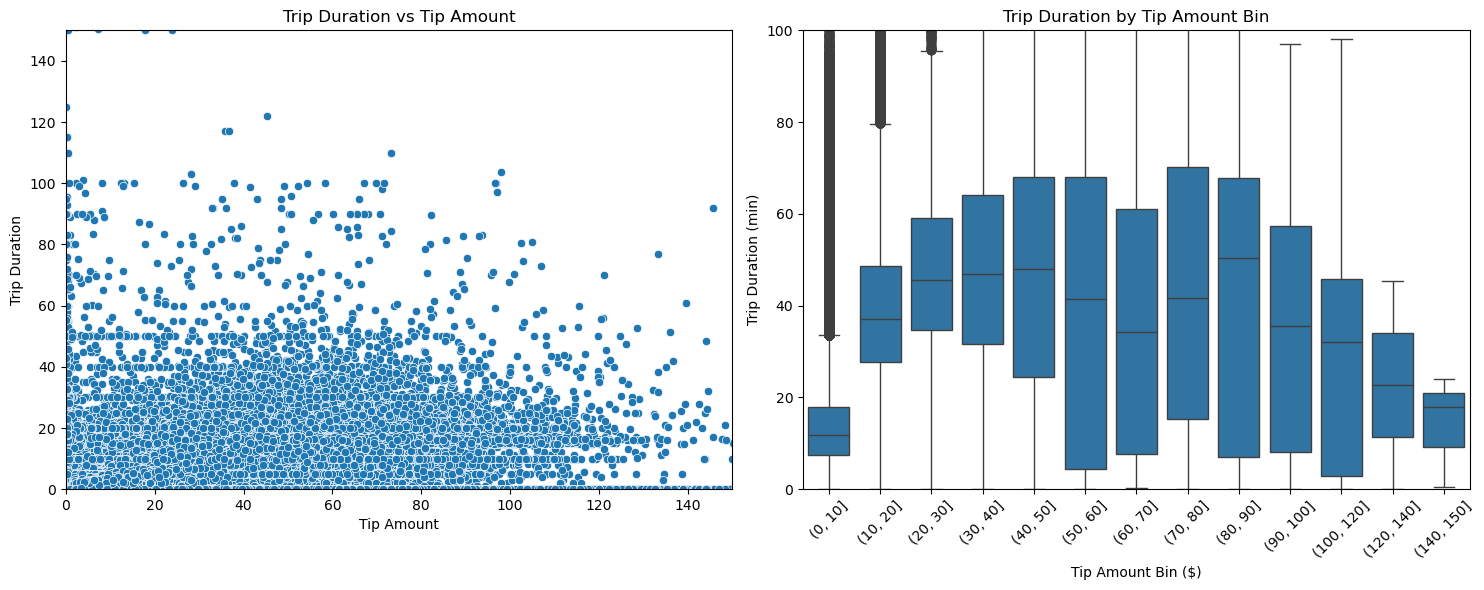

In [66]:
# Show relationship between tip and trip duration

print(f"Correletaion Matrix - \n {taxi_wo_zero_df[['tip_amount', 'trip_duration']].corr()}")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(data=taxi_wo_zero_df, x='trip_duration', y='tip_amount', ax=axes[0])
axes[0].set_title('Trip Duration vs Tip Amount')
axes[0].set_ylabel('Trip Duration')
axes[0].set_xlabel('Tip Amount')
axes[0].set_ylim(0,150)
axes[0].set_xlim(0,150)

taxi_wo_zero_df['tip_bin'] = pd.cut(taxi_wo_zero_df['tip_amount'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 150])
sns.boxplot(x='tip_bin', y='trip_duration', data=taxi_wo_zero_df, ax=axes[1])
axes[1].set_xlabel('Tip Amount Bin ($)')
axes[1].set_ylabel('Trip Duration (min)')
axes[1].set_title('Trip Duration by Tip Amount Bin')
axes[1].set_ylim(0,100)
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

Analysis of Trip Duration and Tip Amount
1. There is a weak positive correlation between these two variables. There's a slight tendency for tip amounts to increase with trip duration
2. Most of the data is within 40mins and $40.
3. Median points tend to increase as we move from amount bins (0-10) to (30-40). Then there is fluctuations of medians in amount bins (40-50) to (80-90).
4. For predicting tip amounts, trip distance appears to be a more influential feature than trip duration based on this EDA.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [67]:
# Analyse the distribution of different payment types (payment_type).


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [68]:
print(f'Distribution of different payment types across trips \n {taxi_wo_zero_df.payment_type.value_counts()}')


Distribution of different payment types across trips 
 payment_type
1    1486230
2     314694
4      13380
3       8701
Name: count, dtype: int64


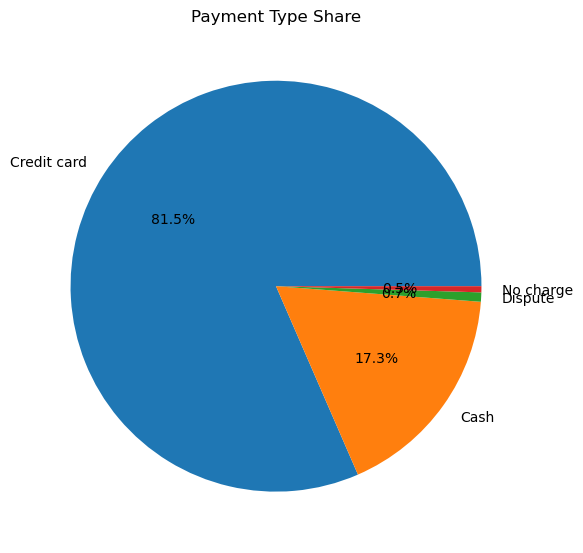

In [69]:
# Plotting PIE chart to get the ratio/proportions of each payment type contributing to fare amount

payment_counts = taxi_wo_zero_df['payment_type'].value_counts()
payment_percent = taxi_wo_zero_df['payment_type'].value_counts(normalize=True) * 100
payment_distribution = pd.DataFrame({'Count': payment_counts,'Percentage': payment_percent.round(2)})

payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}

plt.figure(figsize=(6, 6))
payment_distribution['Percentage'].plot(kind='pie', labels=payment_distribution.index.map(payment_labels), autopct='%1.1f%%')
plt.ylabel('')
plt.title('Payment Type Share')
plt.tight_layout()
plt.show()

In [70]:
print(f'Distribution of payment_type and fare_amount')
taxi_wo_zero_df.groupby('payment_type')['fare_amount'].agg(['mean', 'max']).reset_index()

Distribution of payment_type and fare_amount


,payment_type,mean,max
0,1,19.719227,475.0
1,2,19.751741,500.0
2,3,16.288185,453.8
3,4,19.848445,499.0


In [71]:
print(f'Distribution of payment_type and tip_amount')
taxi_wo_zero_df.groupby('payment_type')['tip_amount'].agg(['mean', 'max']).reset_index()

Distribution of payment_type and tip_amount


,payment_type,mean,max
0,1,4.392028,223.08
1,2,0.000325,23.83
2,3,0.004499,10.15
3,4,0.018916,90.00


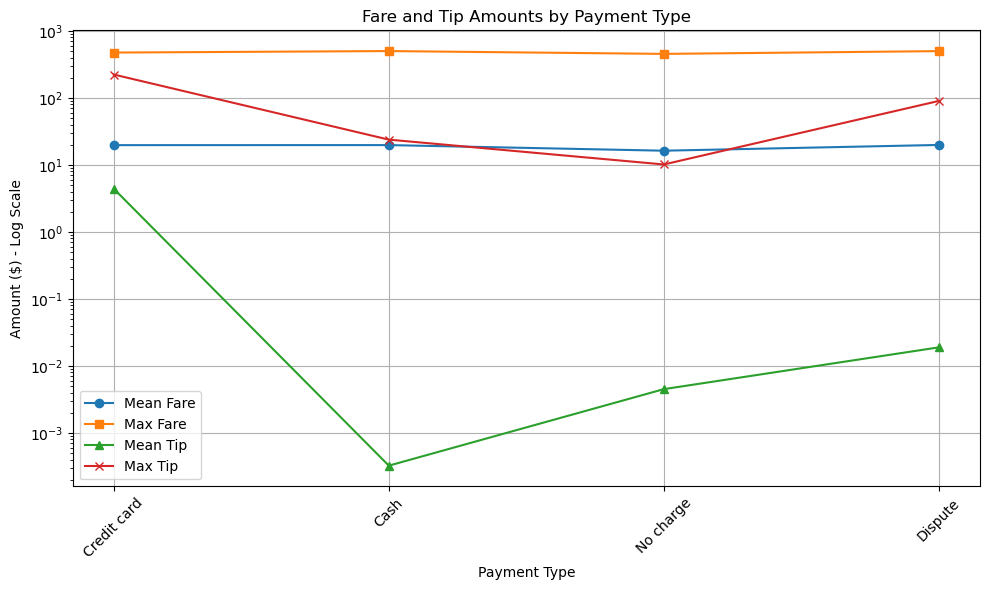

In [72]:
fare_stats = taxi_wo_zero_df.groupby('payment_type')['fare_amount'].agg(['mean', 'max']).reset_index()
tip_stats = taxi_wo_zero_df.groupby('payment_type')['tip_amount'].agg(['mean', 'max']).reset_index()
fare_stats['payment_type'] = fare_stats['payment_type'].map(payment_labels)
tip_stats['payment_type'] = tip_stats['payment_type'].map(payment_labels)

plt.figure(figsize=(10, 6))

# Plot fare_amount
plt.plot(fare_stats['payment_type'], fare_stats['mean'], marker='o', label='Mean Fare')
plt.plot(fare_stats['payment_type'], fare_stats['max'], marker='s', label='Max Fare')

# Plot tip_amount
plt.plot(tip_stats['payment_type'], tip_stats['mean'], marker='^', label='Mean Tip')
plt.plot(tip_stats['payment_type'], tip_stats['max'], marker='x', label='Max Tip')

plt.yscale('log')
plt.title('Fare and Tip Amounts by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Amount ($) - Log Scale')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis of Payment method
1. Most of the payments are made via credit cards.
2. The max and mean amount for credit card, cash and disputed is almost same.
3. Average tip amount is way high in case of credit card.
4. Tip amount is higher in disputed transactions, which may suggest that customers disputing the transsactions when higher tip is registered. This may be cases where customer might have paid and then realised the tip amount is high.
5. Mean tip amount is very less in cash, suggesting data might not have been recorded.


##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [73]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [74]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('~/Documents/Personal/UpGrad/MS_AI_ML_Revamp/EDA/EDA_Assignment/Datasets and Dictionary/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1...."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

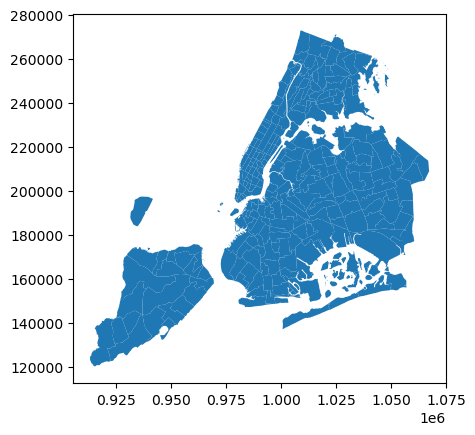

In [75]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [76]:
# Merge zones and trip records using locationID and PULocationID

# We will include only following columns from zones dataframe
zone_col = ['zone', 'LocationID', 'borough']
# We will use Left Join to merge zones data into taxi data so that all the data of taxi dataframe is available.

taxi_merged_df = taxi_wo_zero_df.merge(zones[zone_col], left_on='PULocationID', right_on='LocationID',how='left')
taxi_merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,season,pickup_day,is_weekend,pickup_month,quarter,fare_bin,tip_bin,zone,LocationID,borough
0,2,2023-12-01 00:13:39,2023-12-01 00:21:26,6.0,1.32,1.0,N,158,246,1,...,Winter,Friday,False,Dec,2023Q4,"(0, 10]","(0.0, 10.0]",Meatpacking/West Village West,158.0,Manhattan
1,2,2023-12-01 00:04:20,2023-12-01 00:17:04,1.0,2.07,1.0,N,142,164,2,...,Winter,Friday,False,Dec,2023Q4,"(10, 20]",NaN,Lincoln Square East,142.0,Manhattan
2,2,2023-12-01 00:56:00,2023-12-01 01:03:44,2.0,0.92,1.0,N,186,170,1,...,Winter,Friday,False,Dec,2023Q4,"(0, 10]",NaN,Penn Station/Madison Sq West,186.0,Manhattan
3,2,2023-12-01 00:17:02,2023-12-01 00:23:44,1.0,0.75,1.0,N,186,230,1,...,Winter,Friday,False,Dec,2023Q4,"(0, 10]","(0.0, 10.0]",Penn Station/Madison Sq West,186.0,Manhattan
4,2,2023-12-01 00:02:30,2023-12-01 00:21:31,1.0,3.60,1.0,N,79,50,1,...,Winter,Friday,False,Dec,2023Q4,"(20, 30]","(0.0, 10.0]",East Village,79.0,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [77]:
taxi_merged_df['LocationID'].value_counts().sort_values(ascending=False)

LocationID
132.0    96381
237.0    86659
161.0    85684
236.0    77274
162.0    65499
         ...  
115.0        1
184.0        1
221.0        1
27.0         1
172.0        1
Name: count, Length: 254, dtype: int64

In [78]:
# Group data by location and calculate the number of trips

trip_count = taxi_merged_df['LocationID'].value_counts().reset_index()
trip_count = trip_count.sort_values(by='count', ascending=False)
trip_count.head(20)

,LocationID,count
0,132.0,96381
1,237.0,86659
2,161.0,85684
3,236.0,77274
4,162.0,65499
5,138.0,64131
6,186.0,63176
7,230.0,60989
8,142.0,60723
9,170.0,54325


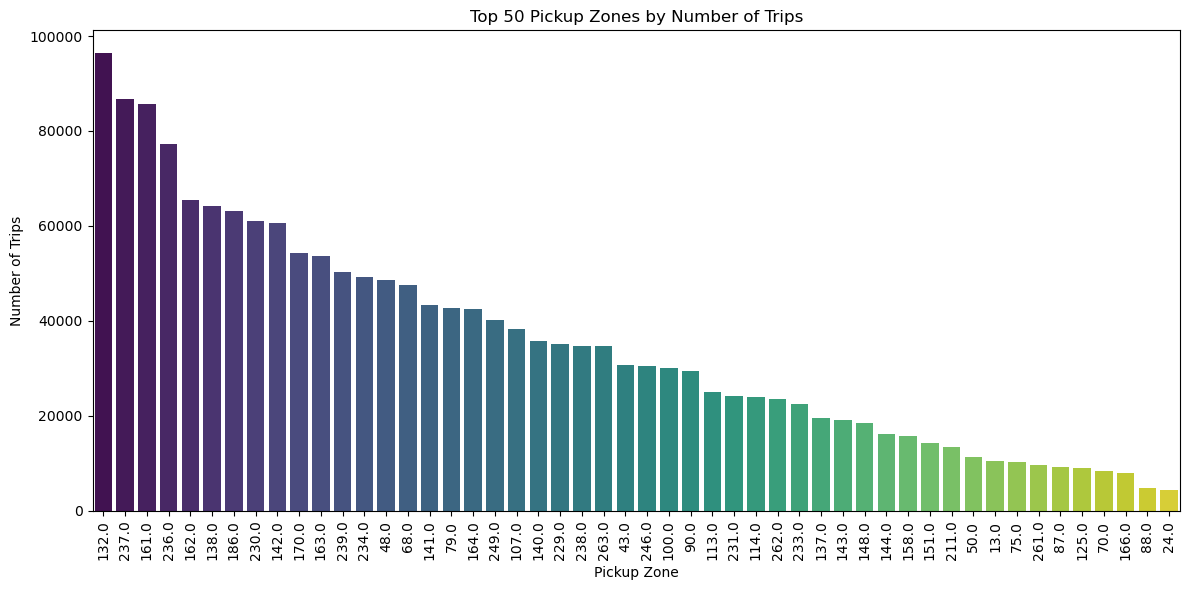

In [79]:

plt.figure(figsize=(12, 6))
sns.barplot(data=trip_count.head(50), x='LocationID', y='count', palette='viridis', order=trip_count['LocationID'].head(50))
plt.title('Top 50 Pickup Zones by Number of Trips')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [80]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = zones.merge(trip_count, on='LocationID', how='left')
zones_with_trips.rename(columns={'count': 'trip_count'}, inplace=True)
zones_with_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...",196.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....",2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...",34.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...",1840.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...",10.0


In [81]:
print(f'Zones where there is null value in trip_count {zones_with_trips["trip_count"].isnull().sum()}')
print(f'These zones didnot have any trips so we can mark them as 0')
zones_with_trips.trip_count.fillna(0, inplace=True)

Zones where there is null value in trip_count 8
These zones didnot have any trips so we can mark them as 0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [82]:
zones_with_trips.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
 7   trip_count  263 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


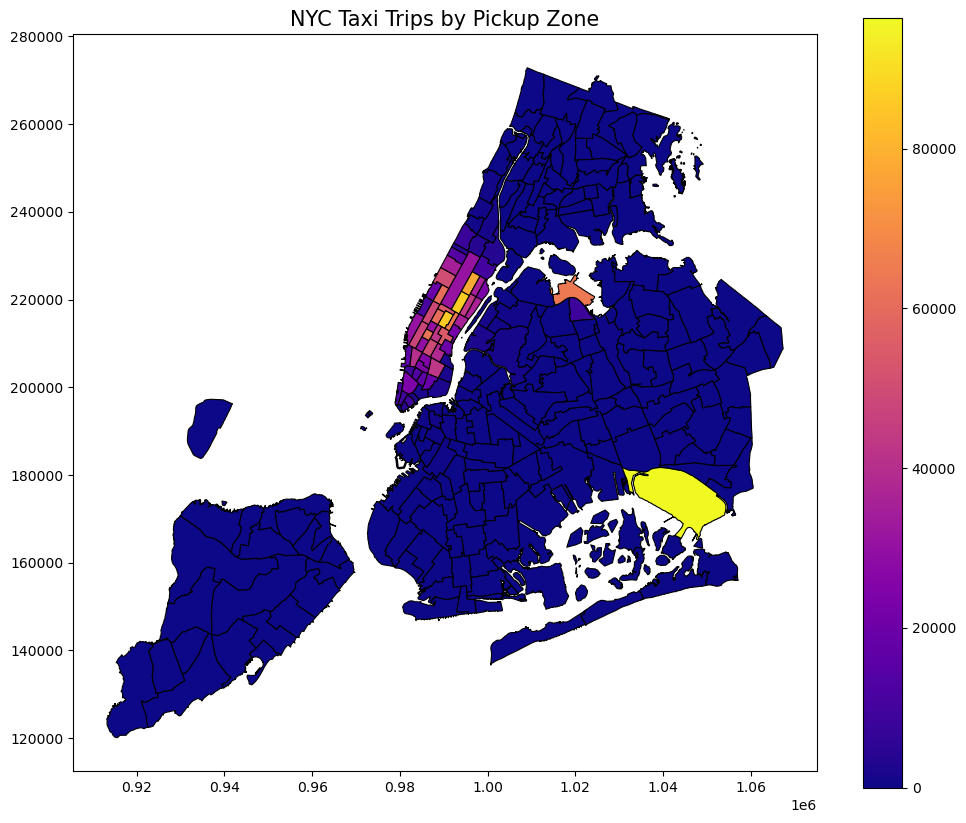

In [83]:
# Define figure and axis
fig, axes = plt.subplots(1,1, figsize=(12,10))

# Plot the map and display it

zones_with_trips.plot(
    column='trip_count',           
    cmap='plasma',           
    linewidth=0.8,
    edgecolor='black',
    legend=True,
    ax=axes
)

axes.set_title("NYC Taxi Trips by Pickup Zone", fontsize=15)
plt.show()


In [84]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_trips.sort_values(by='trip_count', ascending=False)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1.03e+06 1.81e+05, 1.03e+06 1....",96381.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((9.94e+05 2.17e+05, 9.94e+05 2.17e+05...",86659.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((9.91e+05 2.14e+05, 9.91e+05 2.14e+05...",85684.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((9.96e+05 2.21e+05, 9.96e+05 2.21e+05...",77274.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((9.92e+05 2.14e+05, 9.92e+05 2.14e+05...",65499.0
...,...,...,...,...,...,...,...,...
104,105,0.077425,0.000369,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((9.8e+05 1.92e+05, 9.8e+05 1.92e+05, ...",0.0
102,103,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((9.72e+05 1.91e+05, 9.72e+05 1.91e+05...",0.0
98,99,0.183371,0.001210,Freshkills Park,99,Staten Island,"POLYGON ((9.37e+05 1.53e+05, 9.37e+05 1.52e+05...",0.0
109,110,0.103946,0.000526,Great Kills Park,110,Staten Island,"POLYGON ((9.51e+05 1.4e+05, 9.52e+05 1.39e+05,...",0.0


In [85]:
# Analysing Trips and Borough
trips_borough = zones_with_trips.groupby('borough', as_index=False)['trip_count'].sum().sort_values(by='trip_count',ascending=False)
trips_borough

,borough,trip_count
3,Manhattan,1610711.0
4,Queens,181886.0
1,Brooklyn,9543.0
0,Bronx,2593.0
2,EWR,196.0
5,Staten Island,101.0


Analysis on Zones
1. In zones, the JFK Airport contributes maximum amount of Trips close to 96k.
2. Interestingly, Manhattan tops the lists with number of trips close to 1.6M which is about 9 times than Queens.

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


* Busiest hours, days and months
1. Peak demand occurs during 3 PM to 7 PM, with a secondary spike from 6 AM to 9 AM.
2. Weekday demand increases from Monday to Thursday, with Wednesday and Thursday being the busiest.
3. Saturday remains strong in demand, suggesting leisure travel.
4. Spring months (March–May) see the highest demand, especially in May.
5. Slump periods: February and summer months (July–September).

* Revenue Trend
1. May and October generate the highest revenue (~$5M).
2. February generates the least (<$4M).
3. Q2 (Apr–Jun) and Q4 (Oct–Dec) are the highest revenue quarters, aligning with tourist seasons.
4. Q1 and Q3 lag slightly behind, though Q1 (22.8%) and Q3 (23.7%) are very close.


*  Fare Vs trip distance, trip duration and passenger counts
1. Strong positive correlation — longer trips have higher fare.
2. For trips up to 30 miles, there's high variance, indicating short rides can be expensive
3. Solo travelers (1 passenger) show highest average fare, possibly skewed by outliers.
4. Couples and small groups (2-4) also show slightly higher fares.
5. Median fare is fairly stable (~$18–$23) across all passenger groups.

* Tip amount and Trip distance
1. Most of Tip is concentrated within 40 miles / $40.
2. Median tip increases gradually up to 30–40 mins, then fluctuates.
3. Trip distance appears to be more influential in predicting tip amount.

* Payment Method Analysis
1. Credit cards are the dominant payment mode.
2. Average tip amount is highest in credit card transactions.
3. Disputed transactions show high tips, possibly due to post-transaction realization by the customer.
4. Cash payments show very low tip amounts, potentially due to unrecorded data.

* Busiest zones
1. Certain zones like “207 → 207”, “216 → 216”, “144 → 100”, and “113 → 244” appear repeatedly among the slowest routes.
2. These indicate congested corridors or high-traffic zones.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [86]:
# Find routes which have the slowest speeds at different times of the day

taxi_merged_df['speed_mph'] = taxi_merged_df.trip_distance/(taxi_merged_df.trip_duration/60)

# Considering PULocationID -> DOLocationID as route
taxi_merged_df['route'] = taxi_merged_df['PULocationID'].astype(str) + ' -> ' + taxi_merged_df['DOLocationID'].astype(str)

# Grouping Trip data with pickup_hour and route
slow_routes_by_hour = (taxi_merged_df.groupby(['pickup_hour', 'route'])['speed_mph'].mean().reset_index())

print(f'There are routes where speed_mph is 0 as the trip_distance is 0. Removing those rows - {(slow_routes_by_hour.speed_mph==0).sum()}')

slow_routes_by_hour = slow_routes_by_hour[~(slow_routes_by_hour.speed_mph == 0)]

# Here we select the slowest speed with hour and route
slowest_routes = (slow_routes_by_hour.sort_values(['pickup_hour', 'speed_mph']).groupby('pickup_hour').first().reset_index())
slowest_routes.head()


There are routes where speed_mph is 0 as the trip_distance is 0. Removing those rows - 611


,pickup_hour,route,speed_mph
0,0,216 -> 216,0.592105
1,1,258 -> 258,0.026230
2,2,144 -> 100,0.121962
3,3,151 -> 151,0.090000
4,4,237 -> 238,0.120376


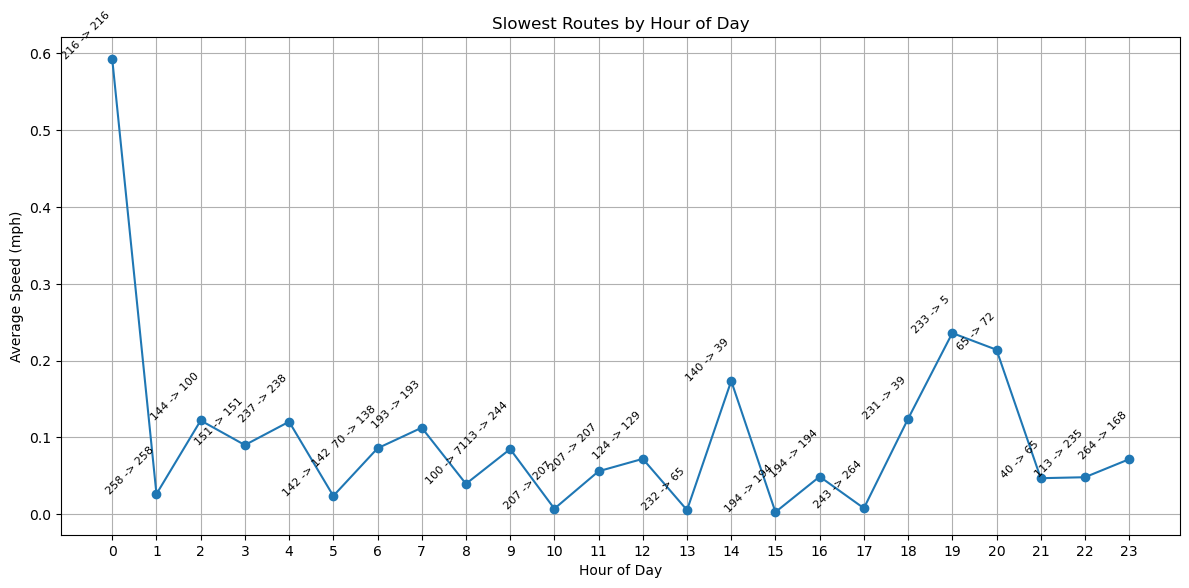

In [87]:
# Plotting the dataframe gives the slowest routes spread across hour of day.
plt.figure(figsize=(12, 6))
plt.plot(slowest_routes['pickup_hour'], slowest_routes['speed_mph'], marker='o')
plt.xticks(range(0, 24))
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed (mph)')
plt.title('Slowest Routes by Hour of Day')
plt.grid(True)

# Annotate route on plot
for i, row in slowest_routes.iterrows():
    plt.text(row['pickup_hour'], row['speed_mph'], row['route'], fontsize=8, ha='right', rotation=45)

plt.tight_layout()
plt.show()

In [88]:
route_list = slowest_routes['route'].astype(str).str.strip().tolist()

print(f'List of zones which have lowest average speed')
taxi_merged_df[taxi_merged_df['route'].isin(route_list)]['zone'].unique()

List of zones which have lowest average speed


array(['Upper East Side South', 'Saint Michaels Cemetery/Woodside',
       'Lincoln Square East', 'Manhattan Valley',
       'Queensbridge/Ravenswood', 'Garment District',
       'Little Italy/NoLiTa', 'Woodhaven', 'East Elmhurst', nan,
       'Two Bridges/Seward Park', 'Greenwich Village North',
       'South Ozone Park', 'Carroll Gardens', 'Lenox Hill East',
       'TriBeCa/Civic Center', 'Downtown Brooklyn/MetroTech',
       'Howard Beach', 'Randalls Island', 'UN/Turtle Bay South',
       'Washington Heights North'], dtype=object)

Analyse Slowest routes across Hour of Day
1. We see that across most of the plottint speed varies between 0.0 to 0.2.
2. There is an increase in slowest speed in rush hour.
3. At 12am we see jump in average speed at 0.6mph. This is due to reduced traffic on road.

In [89]:
# Identify routes with high trip count
high_demand_route = taxi_merged_df.route.value_counts().sort_values(ascending=False).reset_index()
high_demand_route.rename(columns={'count': 'trip_count'}, inplace=True)


In [90]:
# List top 50 routes with respect to high demand
high_demand_route.head(50)

,route,trip_count
0,264 -> 264,13994
1,237 -> 236,12595
2,236 -> 237,10860
3,237 -> 237,8664
4,236 -> 236,8357
5,161 -> 237,6017
6,237 -> 161,5743
7,161 -> 236,5109
8,142 -> 239,4931
9,239 -> 142,4604


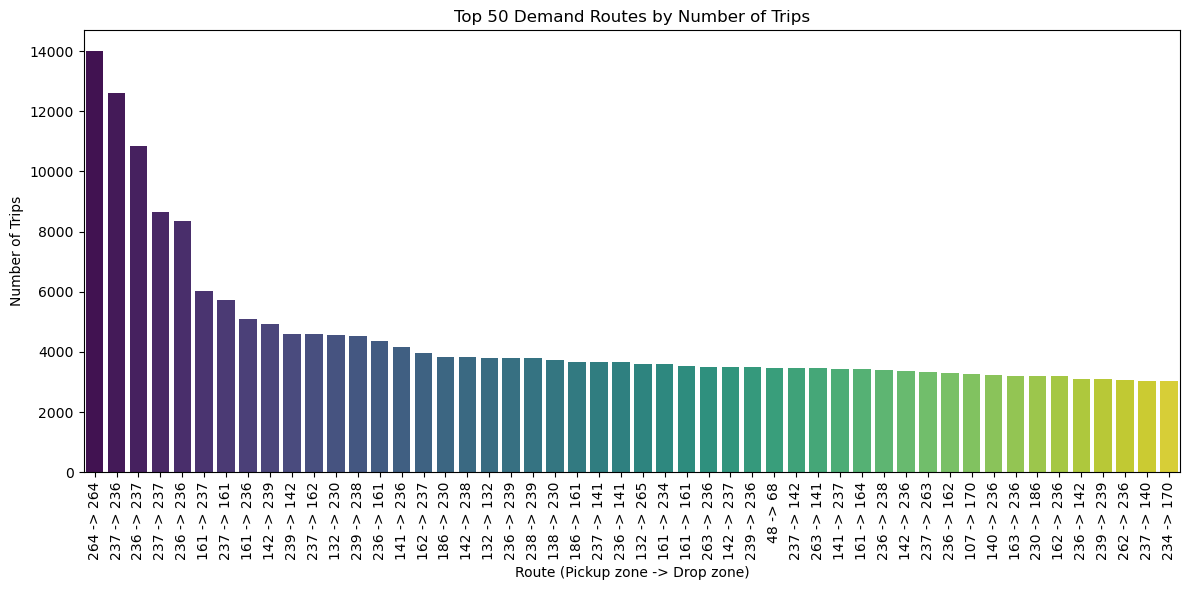

In [91]:
# Top 50 routes with respect to Trips

plt.figure(figsize=(12, 6))
sns.barplot(data=high_demand_route.head(50), x='route', y='trip_count', palette='viridis', order=high_demand_route['route'].head(50))
plt.title('Top 50 Demand Routes by Number of Trips')
plt.xlabel('Route (Pickup zone -> Drop zone)')
plt.ylabel('Number of Trips')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [92]:
route_list = high_demand_route.head(50)['route'].astype(str).str.strip().tolist()

print(f'List of zones which have heavy Demand')
taxi_merged_df[taxi_merged_df['route'].isin(route_list)]['zone'].unique()

List of zones which have heavy Demand


array(['Penn Station/Madison Sq West', 'Lincoln Square East',
       'Upper East Side South', 'Upper West Side South', 'Yorkville West',
       nan, 'Midtown Center', 'JFK Airport', 'Upper East Side North',
       'Midtown East', 'LaGuardia Airport', 'Clinton East',
       'Times Sq/Theatre District', 'Gramercy', 'Lenox Hill West',
       'Midtown North', 'Union Sq', 'Yorkville East',
       'Upper West Side North', 'Lenox Hill East'], dtype=object)

How does identifying high-traffic, high-demand routes help us?

Identifying the high-traffic and high-demand routes helps in maximizing the revenue.
- Placing more taxis in high demand zone
- Restrategize on surchage, to increase revenue
- Dynamic pricing can be introduced in high demand routes during high demand hrs.
- Congestion charges can be looked into, for increasing revenue.
- Optimizing routing for congestion areas.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

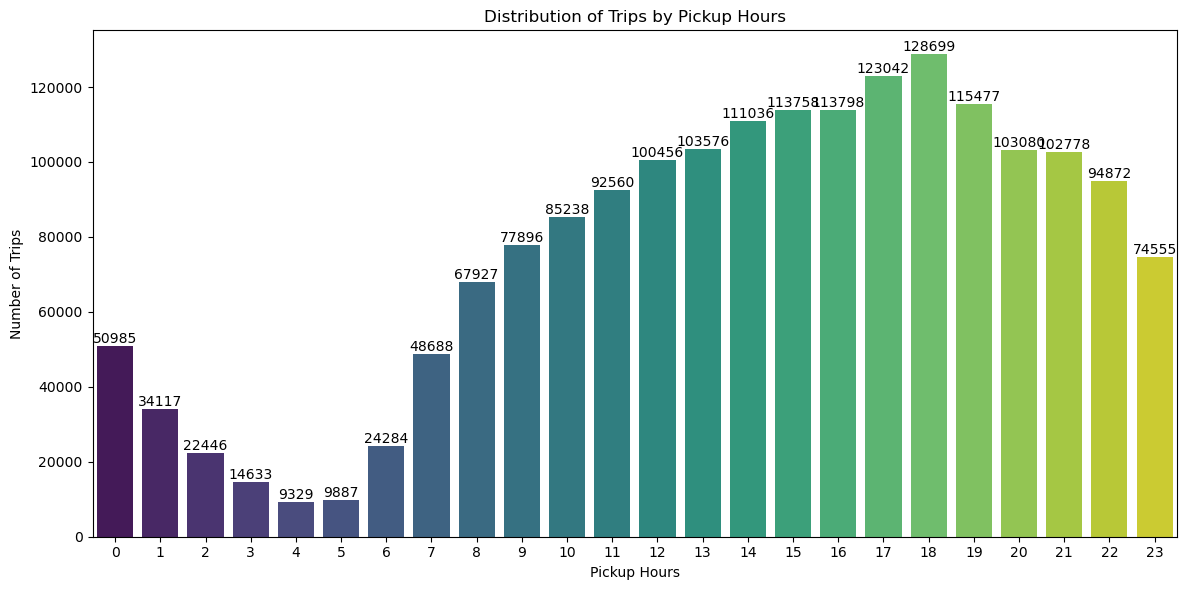

The Busiest hour is 18 with Number of Trips 128699


In [93]:
# Visualise the number of trips per hour and find the busiest hour

trips_by_hour = taxi_merged_df.pickup_hour.value_counts().sort_values(ascending=False).reset_index()
trips_by_hour.rename(columns={'count':'trip_count'}, inplace=True)

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=taxi_merged_df, x='pickup_hour', palette='viridis')
plt.title('Distribution of Trips by Pickup Hours')
plt.xlabel('Pickup Hours')
plt.ylabel('Number of Trips')

for container in ax.containers: # To show values at each Bar
    ax.bar_label(container)

plt.tight_layout()
plt.show()


print(f'The Busiest hour is {trips_by_hour.iloc[0][0]} with Number of Trips {trips_by_hour.iloc[0][1]}')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [94]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
scale_factor = 1/sample_fraction
trips_by_hour['trip_count'] = trips_by_hour['trip_count'] * scale_factor
print(f'Top 5 Busiest Hours')
trips_by_hour.head(5)


Top 5 Busiest Hours


,pickup_hour,trip_count
0,18,2573980.0
1,17,2460840.0
2,19,2309540.0
3,16,2275960.0
4,15,2275160.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

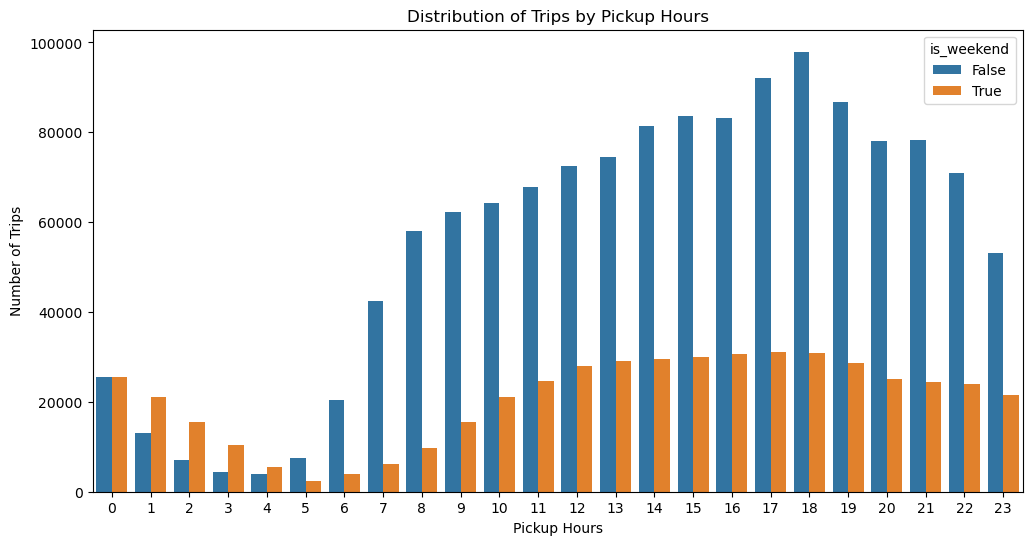

In [95]:
# Compare traffic trends for the week days and weekends

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=taxi_merged_df, x='pickup_hour', hue='is_weekend')
plt.title('Distribution of Trips by Pickup Hours')
plt.xlabel('Pickup Hours')
plt.ylabel('Number of Trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Following are the inferences
1. Busiest hours for Taxis is between 4pm to 7pm, with demand peaking at 6pm.
2. Lean hours are 2am to 5am
3. Demand in higher on weekends for late night hours (12 am - 4am)
4. During the day we see weekdays have consistently higher demand.
5. There is heavy spike for hours 6am to 8am.

Analysis these patterns it will help in optimizing number of Taxis on the road.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [96]:

# Filter data for top 10

# Group by pickup_hour and Pickup Location ID
pickup_by_hour = (taxi_merged_df.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='pickup_count'))

# Group by pickup_hour and Dropff Location ID
dropoff_by_hour = (taxi_merged_df.groupby(['dropff_hour', 'DOLocationID']).size().reset_index(name='dropoff_count'))




In [97]:
print(f'Top 10 Pickup Zones IDs')
pickup_count = pickup_by_hour.groupby('PULocationID')['pickup_count'].sum().sort_values(ascending=False).reset_index()
pickup_count.head(10)

Top 10 Pickup Zones IDs


,PULocationID,pickup_count
0,132,96381
1,237,86659
2,161,85684
3,236,77274
4,162,65499
5,138,64131
6,186,63176
7,230,60989
8,142,60723
9,170,54325


In [98]:
print(f'Top 10 Dropoff Zones IDs')
dropoff_count = dropoff_by_hour.groupby('DOLocationID')['dropoff_count'].sum().sort_values(ascending=False).reset_index()
dropoff_count.head(10)

Top 10 Dropoff Zones IDs


,DOLocationID,dropoff_count
0,236,81028
1,237,77419
2,161,71329
3,230,56257
4,170,54157
5,162,52106
6,142,51318
7,239,51116
8,141,48399
9,68,46188


In [99]:
# Find top 10 pickup and dropoff zones

# Merge with zones dataframe to get zone information
print(f"Top 10 Pickup Zones \n {pickup_count.head(10).merge(zones, left_on='PULocationID', right_on='LocationID', how='left')['zone'].values} \n")
print(f"Top 10 Dropoff Zones \n {dropoff_count.head(10).merge(zones, left_on='DOLocationID', right_on='LocationID', how='left')['zone'].values} \n")


Top 10 Pickup Zones 
 ['JFK Airport' 'Upper East Side South' 'Midtown Center'
 'Upper East Side North' 'Midtown East' 'LaGuardia Airport'
 'Penn Station/Madison Sq West' 'Times Sq/Theatre District'
 'Lincoln Square East' 'Murray Hill'] 

Top 10 Dropoff Zones 
 ['Upper East Side North' 'Upper East Side South' 'Midtown Center'
 'Times Sq/Theatre District' 'Murray Hill' 'Midtown East'
 'Lincoln Square East' 'Upper West Side South' 'Lenox Hill West'
 'East Chelsea'] 



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [100]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Merge the dataframes of pickup and dropoff on basis of Location
pickup_dropoff_df = pickup_count.merge(dropoff_count, left_on='PULocationID', right_on='DOLocationID', how='inner')
pickup_dropoff_df = pickup_dropoff_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='inner')
pickup_dropoff_df['pickup_drop_ratio'] = pickup_dropoff_df['pickup_count']/pickup_dropoff_df['dropoff_count']


In [101]:
print(f'Top 10 zones with high Pickup/Drop ratio')
pickup_dropoff_df[['zone', 'pickup_drop_ratio']].sort_values(by='pickup_drop_ratio', ascending=False).head(10).reset_index(drop=True)

Top 10 zones with high Pickup/Drop ratio


,zone,pickup_drop_ratio
0,East Elmhurst,8.657620
1,JFK Airport,4.615727
2,LaGuardia Airport,2.890998
3,Penn Station/Madison Sq West,1.576720
4,Central Park,1.375163
5,Greenwich Village South,1.374636
6,West Village,1.325880
7,Midtown East,1.257034
8,Midtown Center,1.201251
9,Garment District,1.190621


In [102]:
print(f'Bottom 10 zones with high Pickup/Drop ratio')
pickup_dropoff_df[['zone', 'pickup_drop_ratio']].sort_values(by='pickup_drop_ratio', ascending=True).head(10).reset_index(drop=True)

Bottom 10 zones with high Pickup/Drop ratio


,zone,pickup_drop_ratio
0,Breezy Point/Fort Tilden/Riis Beach,0.025641
1,Stapleton,0.031250
2,Windsor Terrace,0.032389
3,Newark Airport,0.036960
4,Grymes Hill/Clifton,0.043478
5,Ridgewood,0.043788
6,Pelham Bay Park,0.047619
7,Heartland Village/Todt Hill,0.048780
8,Bushwick South,0.055741
9,Greenpoint,0.056613


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [103]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_pickup = pickup_by_hour[pickup_by_hour['pickup_hour'].isin([0, 1, 2, 3, 4, 5, 23])].sort_values(by='pickup_count', ascending=False).reset_index(drop=True)
night_dropoff = dropoff_by_hour[dropoff_by_hour['dropff_hour'].isin([0, 1, 2, 3, 4, 5, 23])].sort_values(by='dropoff_count', ascending=False).reset_index(drop=True)

# Merge the dataframes with zones dataframe to identify the zone

night_pickup_zone_hrly = night_pickup.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left').sort_values(by='pickup_count', ascending=False).reset_index(drop=True)
night_dropoff_zone_hrly = night_dropoff.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left').sort_values(by='dropoff_count', ascending=False).reset_index(drop=True)

night_pickup_zone = night_pickup_zone_hrly.groupby(['LocationID', 'zone'], as_index=False)['pickup_count'].sum().sort_values(by='pickup_count', ascending=False)
night_dropoff_zone = night_dropoff_zone_hrly.groupby(['LocationID', 'zone'], as_index=False)['dropoff_count'].sum().sort_values(by='dropoff_count', ascending=False)

print(f'Top 10 Zones for Night hours (11pm - 5AM) \n')
print(f'Pickup Zones - \n {night_pickup_zone.zone.head(10).values} \n')
print(f'Dropoff Zones - \n {night_dropoff_zone.zone.head(10).values} \n')

Top 10 Zones for Night hours (11pm - 5AM) 

Pickup Zones - 
 ['East Village' 'JFK Airport' 'West Village' 'Clinton East'
 'Lower East Side' 'Greenwich Village South' 'Times Sq/Theatre District'
 'Penn Station/Madison Sq West' 'Midtown South' 'East Chelsea'] 

Dropoff Zones - 
 ['East Village' 'Clinton East' 'Murray Hill' 'East Chelsea' 'Gramercy'
 'Lenox Hill West' 'Yorkville West' 'West Village'
 'Times Sq/Theatre District' 'Upper West Side South'] 



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [104]:
# Filter for night hours (11 PM to 5 AM)

taxi_data_night = taxi_merged_df[(taxi_merged_df['pickup_hour'].isin([0, 1, 2, 3, 4, 5, 23])) & (taxi_merged_df['dropff_hour'].isin([0, 1, 2, 3, 4, 5, 23]))]

In [105]:
taxi_data_night.shape

(212909, 35)

In [106]:
# Filter data for day time (5AM to 10PM) - Not Night time hours
taxi_data_day = taxi_merged_df[~((taxi_merged_df['pickup_hour'].isin([0, 1, 2, 3, 4, 5, 23])) & (taxi_merged_df['dropff_hour'].isin([0, 1, 2, 3, 4, 5, 23])))]

In [107]:
taxi_data_day.shape

(1610208, 35)

Revenue from Night time Trips 6193109.829999999
Revenue from Day time Trips 46398415.73000001


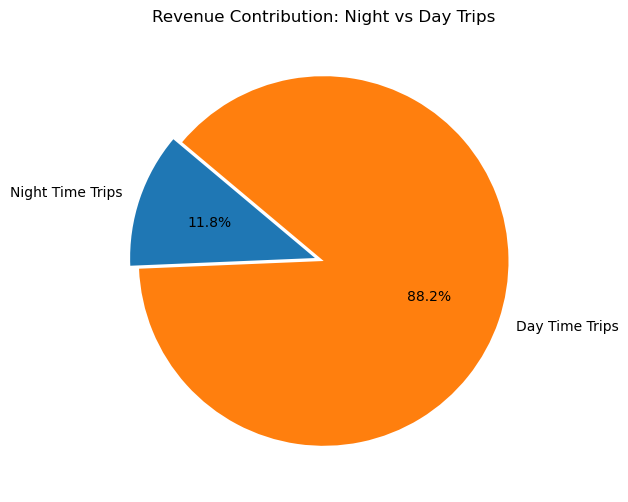

In [108]:
night_revenue = taxi_data_night.total_amount.sum()
day_revenue = taxi_data_day.total_amount.sum()

print(f'Revenue from Night time Trips {night_revenue}')
print(f'Revenue from Day time Trips {day_revenue}')


# Labels and values
labels = ['Night Time Trips', 'Day Time Trips']
revenues = [night_revenue, day_revenue]
explode = (0.05, 0)  # Explode the night time revenue

plt.figure(figsize=(6, 6))
plt.pie(
    revenues,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode
)
plt.title('Revenue Contribution: Night vs Day Trips')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [109]:
# Analyse the fare per mile per passenger for different passenger counts

# Removing rows where trip_distance is 0, as this will induce division by zero error.

taxi_merged_df = taxi_merged_df[(taxi_merged_df['trip_distance'] > 0)]

# Calculate fare per mile for each trip.
taxi_merged_df['fare_per_mile'] = taxi_merged_df['fare_amount']/ taxi_merged_df['trip_distance'] 

# Calculate Average fare per mile per passenger for each passenger count.
taxi_avg_fare_per_mile_per_passenger = taxi_merged_df.groupby('passenger_count', as_index=False)['fare_per_mile'].agg('mean')
taxi_avg_fare_per_mile_per_passenger['avg_fare_per_mile_per_passenger'] = taxi_avg_fare_per_mile_per_passenger['fare_per_mile']/taxi_avg_fare_per_mile_per_passenger['passenger_count']
taxi_avg_fare_per_mile_per_passenger.drop('fare_per_mile', axis=1, inplace=True)

print(f'Average Fare per mile per passenger Across Passenger count - \n')
taxi_avg_fare_per_mile_per_passenger

Average Fare per mile per passenger Across Passenger count - 



,passenger_count,avg_fare_per_mile_per_passenger
0,1.0,10.850902
1,2.0,6.467983
2,3.0,3.942366
3,4.0,4.380333
4,5.0,1.709852
5,6.0,1.351391


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [110]:
# Compare the average fare per mile for different days and for different times of the day

print(f'Average Fare per Mile Across Days of Week \n')
taxi_merged_df.groupby('pickup_day', as_index=False)['fare_per_mile'].agg('mean').sort_values(by='fare_per_mile', ascending=False).rename(columns = {'fare_per_mile':'avg_fare_per_mile'}).reset_index(drop=True)


Average Fare per Mile Across Days of Week 



,pickup_day,avg_fare_per_mile
0,Sunday,12.679804
1,Tuesday,11.348938
2,Thursday,11.209851
3,Wednesday,11.072212
4,Saturday,10.988632
5,Monday,10.963886
6,Friday,10.928707


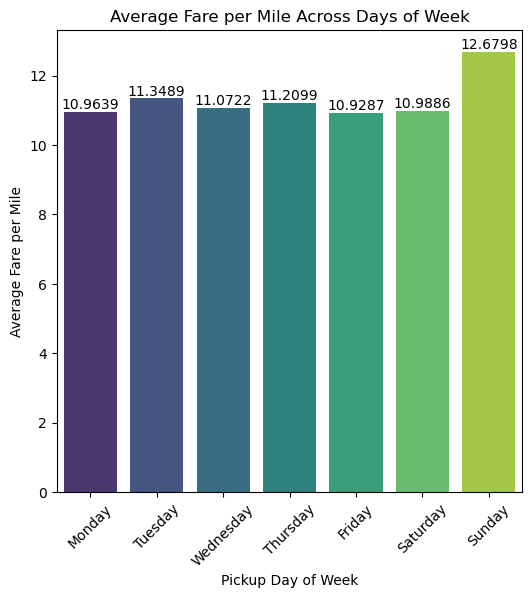

In [111]:
# Plotting Average fare per mile against pickup day

data_df = taxi_merged_df.groupby('pickup_day', as_index=False)['fare_per_mile'].agg('mean').sort_values(by='fare_per_mile', ascending=False).rename(columns = {'fare_per_mile':'avg_fare_per_mile'})
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(6, 6))
ax = sns.barplot(data=data_df, x='pickup_day', y='avg_fare_per_mile', palette='viridis', order=ordered_days)
plt.title('Average Fare per Mile Across Days of Week')
plt.xlabel('Pickup Day of Week')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation = 45)
for container in ax.containers: # To show values at each Bar
    ax.bar_label(container)
plt.show()

In [112]:
print(f'Average Fare per Mile Across Hours of Day \n')
taxi_merged_df.groupby('pickup_hour', as_index=False)['fare_per_mile'].agg('mean').sort_values(by='fare_per_mile', ascending=False).rename(columns = {'fare_per_mile':'avg_fare_per_mile'})

Average Fare per Mile Across Hours of Day 



,pickup_hour,avg_fare_per_mile
5,5,14.238284
4,4,14.002748
16,16,13.817841
15,15,12.464974
13,13,11.980129
12,12,11.970941
17,17,11.934001
14,14,11.649361
19,19,11.609998
18,18,11.485738


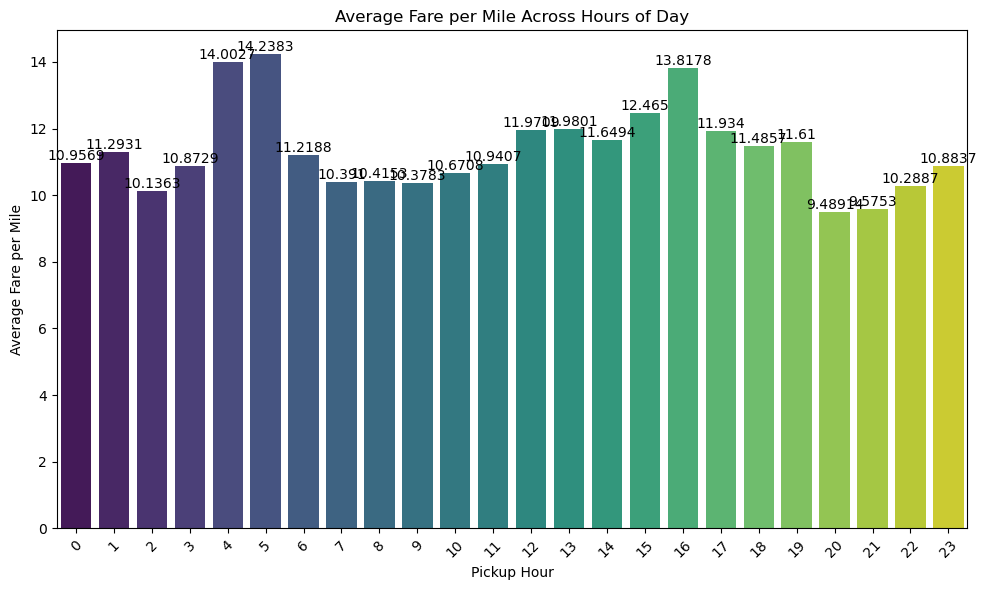

In [113]:
# Plotting Average fare per mile against pickup hour

data_df = taxi_merged_df.groupby('pickup_hour', as_index=False)['fare_per_mile'].agg('mean').sort_values(by='fare_per_mile', ascending=False).rename(columns = {'fare_per_mile':'avg_fare_per_mile'})
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=data_df, x='pickup_hour', y='avg_fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile Across Hours of Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Fare per Mile')
plt.xticks(rotation = 45)
for container in ax.containers: # To show values at each Bar
    labels = ax.bar_label(container)
plt.tight_layout()
plt.show()

Analysis of Average fare per Mile vs Pickup Hour
1. The value is high during the hours 4am and 5am. 
2. Value is tad lower during 4pm.
3. There is a decline inthe value between 5pm - 9pm and then it rises.
4. On Sunday the average fare per mile is way higher than the rest of the days of week.

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [114]:
# Compare fare per mile for different vendors
vendor_hourly_fare = taxi_merged_df.groupby(['VendorID', 'pickup_hour'], as_index=False)['fare_per_mile'].agg('mean').rename(columns={'fare_per_mile':'avg_fare_per_mile'})

print(f'Average fare per mile for different vendors across different hours of day')
vendor_hourly_fare.sort_values(by='pickup_hour')

Average fare per mile for different vendors across different hours of day


,VendorID,pickup_hour,avg_fare_per_mile
0,1,0,6.809143
24,2,0,12.174382
25,2,1,12.539923
1,1,1,7.060615
2,1,2,6.934348
26,2,2,11.113956
3,1,3,6.516866
27,2,3,12.178039
4,1,4,7.508769
28,2,4,16.178541


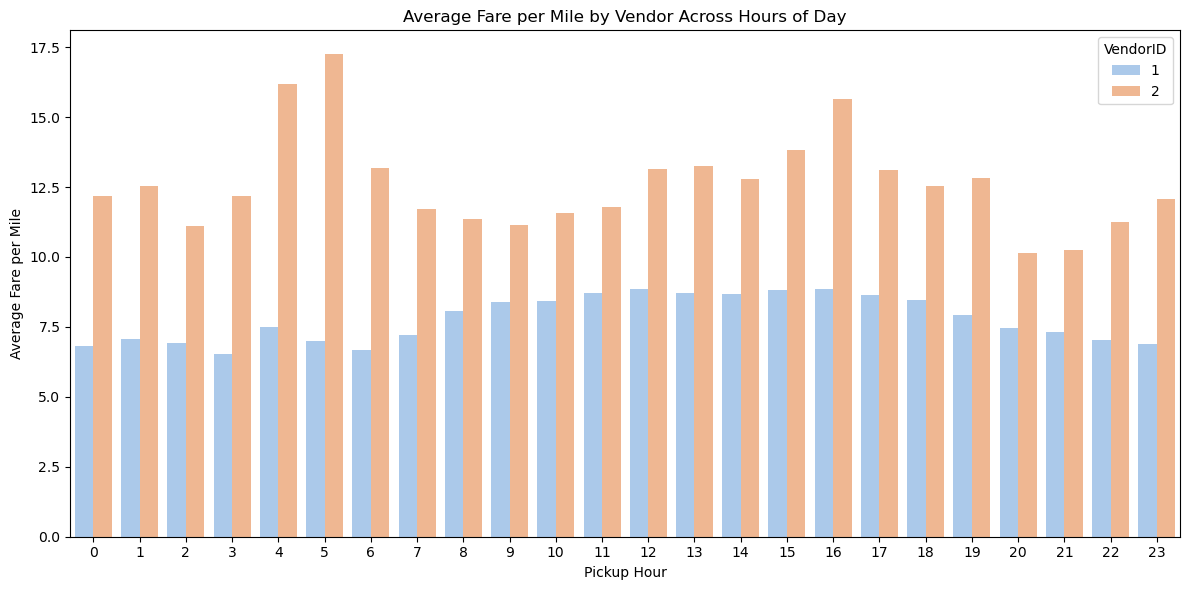

In [115]:
# Visualise the above data in dataframe in subplots for better understanding and trending.

# Plotting Average fare per mile with pickup hour and vendorid.

plt.figure(figsize=(12, 6))
sns.barplot(data=vendor_hourly_fare, x='pickup_hour', y='avg_fare_per_mile', hue='VendorID', palette='pastel')
plt.title('Average Fare per Mile by Vendor Across Hours of Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(0, 24))
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()

Analysis of Average fare per Mile vs Pickup Hour and VendorID
1. The overall values are always higher for vendorid 2 (VeriFone Inc.).
2. The difference is higher for the early morning hrs 4am and 5am.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [116]:
# Defining distance tiers

labels = ['≤2 miles', '2-5 miles', '>5 miles']
taxi_merged_df['trip_distance_bin'] = pd.cut(taxi_merged_df['trip_distance'], bins=[0, 2, 5, taxi_merged_df['trip_distance'].max() + 1], labels=labels)

print('Average fare per mile Across Distance Tiers')
vendor_fare_trip = taxi_merged_df.groupby(['trip_distance_bin', 'VendorID'], as_index=False)['fare_per_mile'].agg('mean').rename(columns={'fare_per_mile':'avg_fare_per_mile'})
vendor_fare_trip

Average fare per mile Across Distance Tiers


,trip_distance_bin,VendorID,avg_fare_per_mile
0,≤2 miles,1,9.931084
1,≤2 miles,2,17.941042
2,2-5 miles,1,6.381358
3,2-5 miles,2,6.549412
4,>5 miles,1,4.425489
5,>5 miles,2,4.503539


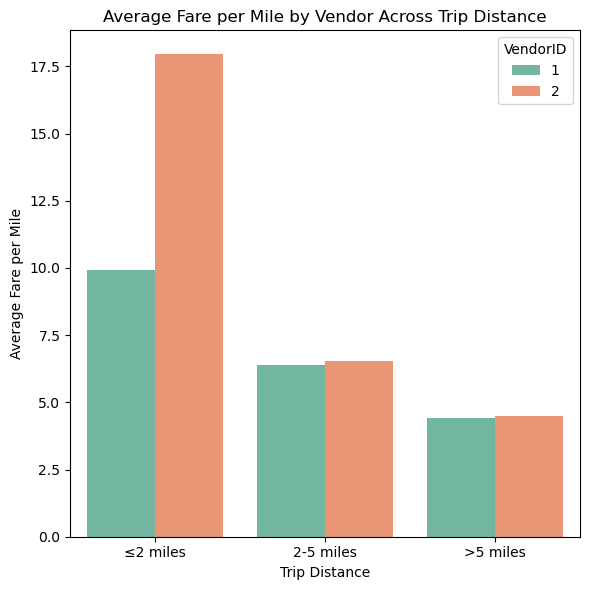

In [117]:
plt.figure(figsize=(6, 6))
sns.barplot(data=vendor_fare_trip, x='trip_distance_bin', y='avg_fare_per_mile', hue='VendorID', palette='Set2')
plt.title('Average Fare per Mile by Vendor Across Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()

Analyse Average fare per mile across Trip Distance
1. The Vendor 2(VeriFone Inc.) have a very high Average fare per mile when trip distancesare less than 2 miles.
2. Both Vendors have comparable values for the metric on medium and far trip distances.

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [118]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage of each trip
taxi_merged_df['tip_percent'] = taxi_merged_df['tip_amount']*100/taxi_merged_df['fare_amount']
taxi_merged_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,fare_bin,tip_bin,zone,LocationID,borough,speed_mph,route,fare_per_mile,trip_distance_bin,tip_percent
0,2,2023-12-01 00:13:39,2023-12-01 00:21:26,6.0,1.32,1.0,N,158,246,1,...,"(0, 10]","(0.0, 10.0]",Meatpacking/West Village West,158.0,Manhattan,10.175589,158 -> 246,7.045455,≤2 miles,30.752688
1,2,2023-12-01 00:04:20,2023-12-01 00:17:04,1.0,2.07,1.0,N,142,164,2,...,"(10, 20]",NaN,Lincoln Square East,142.0,Manhattan,9.753927,142 -> 164,6.521739,2-5 miles,0.000000
2,2,2023-12-01 00:56:00,2023-12-01 01:03:44,2.0,0.92,1.0,N,186,170,1,...,"(0, 10]",NaN,Penn Station/Madison Sq West,186.0,Manhattan,7.137931,186 -> 170,9.347826,≤2 miles,0.000000
3,2,2023-12-01 00:17:02,2023-12-01 00:23:44,1.0,0.75,1.0,N,186,230,1,...,"(0, 10]","(0.0, 10.0]",Penn Station/Madison Sq West,186.0,Manhattan,6.716418,186 -> 230,10.533333,≤2 miles,32.658228
4,2,2023-12-01 00:02:30,2023-12-01 00:21:31,1.0,3.60,1.0,N,79,50,1,...,"(20, 30]","(0.0, 10.0]",East Village,79.0,Manhattan,11.358457,79 -> 50,5.888889,2-5 miles,24.716981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823112,1,2023-06-30 19:25:21,2023-06-30 19:50:09,1.0,3.60,1.0,N,186,238,1,...,"(20, 30]","(0.0, 10.0]",Penn Station/Madison Sq West,186.0,Manhattan,8.709677,186 -> 238,7.250000,2-5 miles,24.904215
1823113,2,2023-06-30 19:30:27,2023-06-30 19:36:48,1.0,1.22,1.0,N,107,79,1,...,"(0, 10]","(0.0, 10.0]",Gramercy,107.0,Manhattan,11.527559,107 -> 79,7.049180,≤2 miles,33.720930
1823114,2,2023-06-30 19:48:44,2023-06-30 19:52:04,1.0,0.56,1.0,N,236,236,1,...,"(0, 10]","(0.0, 10.0]",Upper East Side North,236.0,Manhattan,10.080000,236 -> 236,10.357143,≤2 miles,8.620690
1823115,2,2023-06-30 19:35:08,2023-06-30 19:47:57,1.0,1.85,1.0,N,100,43,1,...,"(10, 20]","(0.0, 10.0]",Garment District,100.0,Manhattan,8.660598,100 -> 43,7.297297,≤2 miles,18.518519


In [119]:
# Average Tip Percentage across Trip Distance Tiers

tip_percent_by_distance = taxi_merged_df.groupby('trip_distance_bin', as_index=False)['tip_percent'].mean()
tip_percent_by_distance

,trip_distance_bin,tip_percent
0,≤2 miles,22.415553
1,2-5 miles,18.769587
2,>5 miles,17.647101


In [120]:
# Average Tip Percentage across Passenger Counts

tip_percent_by_passenger = taxi_merged_df.groupby('passenger_count', as_index=False)['tip_percent'].mean()
tip_percent_by_passenger

,passenger_count,tip_percent
0,1.0,20.936331
1,2.0,19.728015
2,3.0,19.040020
3,4.0,17.440428
4,5.0,20.516059
5,6.0,20.644005


In [121]:
# Average Tip Percentage across Pickup Hour

tip_percent_by_hour = taxi_merged_df.groupby('pickup_hour', as_index=False)['tip_percent'].mean()
tip_percent_by_hour

,pickup_hour,tip_percent
0,0,20.497571
1,1,20.678611
2,2,20.667755
3,3,20.509586
4,4,18.260650
5,5,17.481172
6,6,18.473302
7,7,19.601114
8,8,20.045782
9,9,19.710768


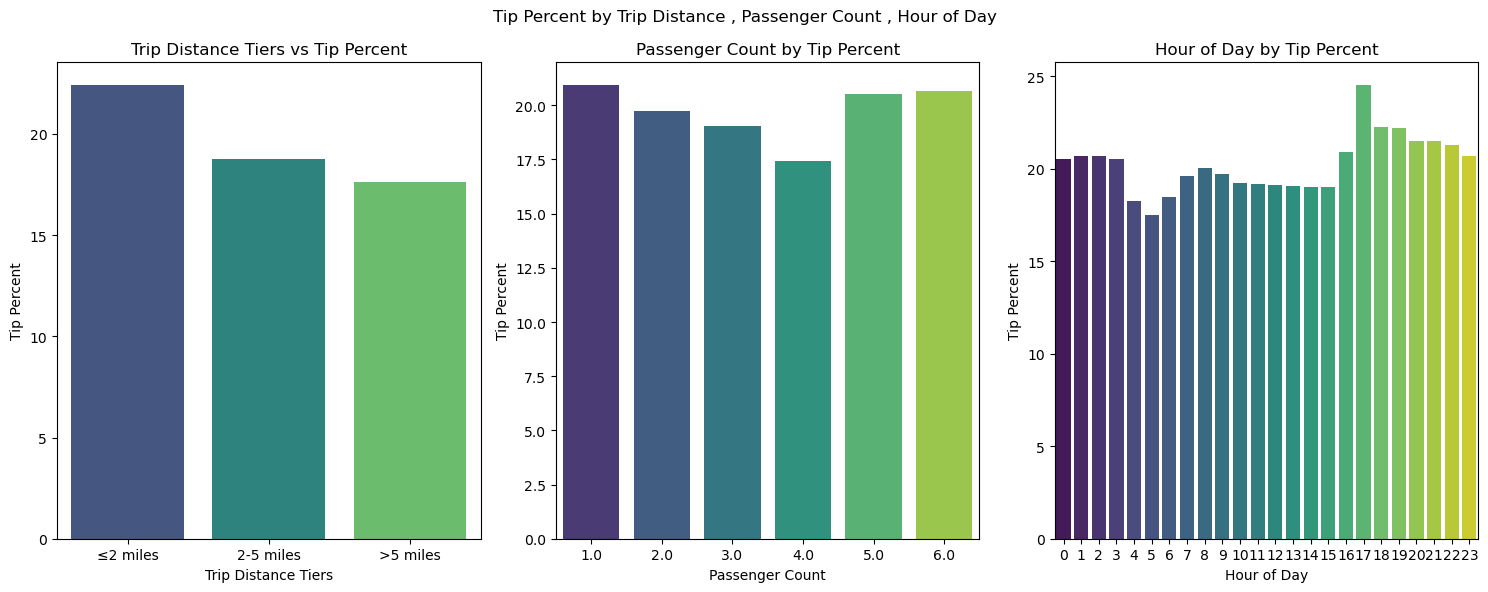

In [122]:
# Visualise the above data in dataframe in subplots for better understanding and trending.

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
sns.barplot(data=tip_percent_by_distance, x='trip_distance_bin', y='tip_percent', ax=axes[0], palette='viridis')
axes[0].set_title('Trip Distance Tiers vs Tip Percent')
axes[0].set_ylabel('Tip Percent')
axes[0].set_xlabel('Trip Distance Tiers')

sns.barplot(data=tip_percent_by_passenger, x='passenger_count', y='tip_percent', ax=axes[1], palette='viridis')
axes[1].set_title('Passenger Count by Tip Percent')
axes[1].set_ylabel('Tip Percent')
axes[1].set_xlabel('Passenger Count')

sns.barplot(data=tip_percent_by_hour, x='pickup_hour', y='tip_percent', ax=axes[2], palette='viridis')
axes[2].set_title('Hour of Day by Tip Percent')
axes[2].set_ylabel('Tip Percent')
axes[2].set_xlabel('Hour of Day')

plt.suptitle('Tip Percent by Trip Distance , Passenger Count , Hour of Day')

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [123]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

tip_percent_less_10 = taxi_merged_df[taxi_merged_df.tip_percent<=10]
tip_percent_less_25 = taxi_merged_df[taxi_merged_df.tip_percent<=25]

In [124]:
print(f"Average Trip Distance for Tip Percent < 10% - {round(tip_percent_less_10['trip_distance'].mean(), 2)}")
print(f"Average Trip Distance for Tip Percent > 25% - {round(tip_percent_less_25['trip_distance'].mean(), 2)}")

print(f"Average Trip Distance for Tip Percent < 10% - {round(tip_percent_less_10['fare_amount'].mean(), 2)}")
print(f"Average Trip Distance for Tip Percent > 25% - {round(tip_percent_less_25['fare_amount'].mean(), 2)}")

print(f"Average Trip Distance for Tip Percent < 10% - {round(tip_percent_less_10['trip_duration'].mean(), 2)}")
print(f"Average Trip Distance for Tip Percent > 25% - {round(tip_percent_less_25['trip_duration'].mean(), 2)}")

Average Trip Distance for Tip Percent < 10% - 3.9
Average Trip Distance for Tip Percent > 25% - 4.46
Average Trip Distance for Tip Percent < 10% - 21.5
Average Trip Distance for Tip Percent > 25% - 23.89
Average Trip Distance for Tip Percent < 10% - 19.96
Average Trip Distance for Tip Percent > 25% - 21.31


Analysis on Tip Amount
1. On smaller trips Tip percent is higher.
2. Tip percent is higher in trips where passenger count is 1,5,6. So Solo and group passengers generally have tendency to give higher Tip.
3. Tip percent is hih during 4pm - 3am, but it drops during the day.
4. Spike is seen at 5pm, which indicate people going home after office tend to give higher tip.

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [125]:
# See how passenger count varies across hours and days

passenger_hour = taxi_merged_df.groupby(['pickup_hour', 'passenger_count'], as_index=False).size().rename(columns={'size':'trip_count'})
passenger_day = taxi_merged_df.groupby(['pickup_day', 'passenger_count'], as_index=False).size().rename(columns={'size':'trip_count'})


In [126]:
print('Passenger Count across pickup Hour  \n')
passenger_hour

Passenger Count across pickup Hour  



,pickup_hour,passenger_count,trip_count
0,0,1.0,37309
1,0,2.0,8614
2,0,3.0,2114
3,0,4.0,1218
4,0,5.0,797
...,...,...,...
139,23,2.0,12978
140,23,3.0,2973
141,23,4.0,1700
142,23,5.0,1075


In [127]:
print('Passenger Count across pickup Day \n')
passenger_day

Passenger Count across pickup Day 



,pickup_day,passenger_count,trip_count
0,Friday,1.0,203114
1,Friday,2.0,42234
2,Friday,3.0,10737
3,Friday,4.0,6018
4,Friday,5.0,3370
5,Friday,6.0,2476
6,Monday,1.0,176610
7,Monday,2.0,32255
8,Monday,3.0,7778
9,Monday,4.0,4163


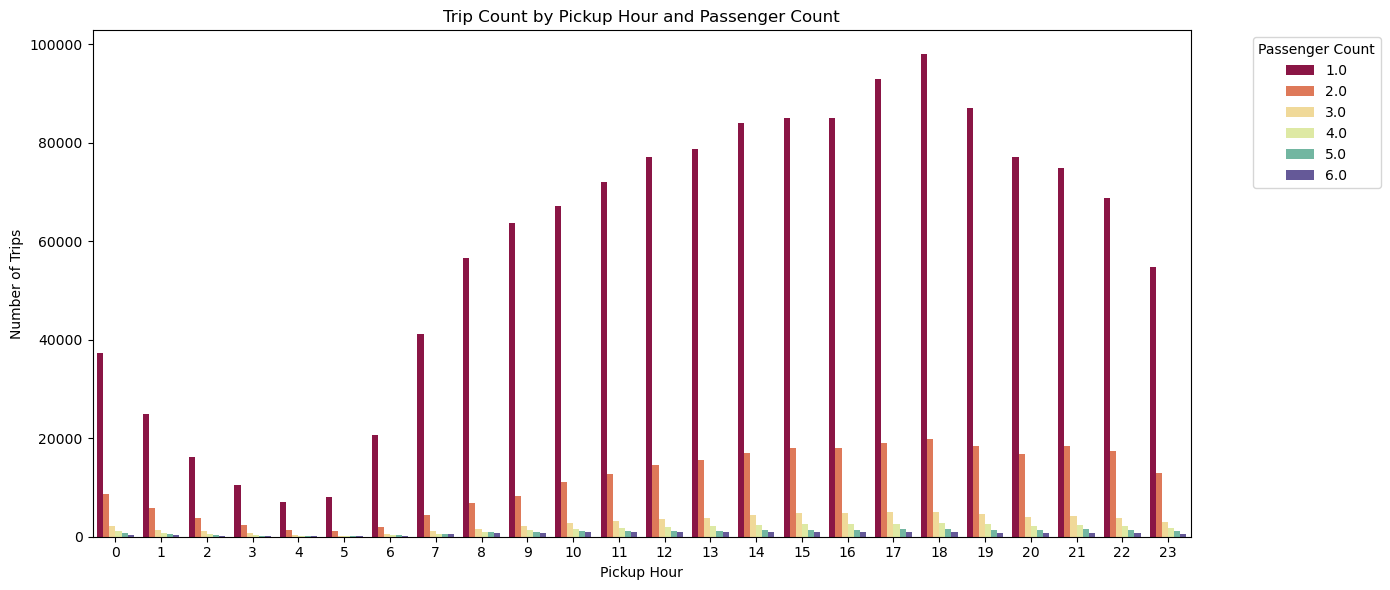

In [128]:
# Visualizing passenger count across hour of day

plt.figure(figsize=(14, 6))
sns.barplot(data=passenger_hour, x='pickup_hour', y='trip_count', hue='passenger_count', palette='Spectral')
plt.title('Trip Count by Pickup Hour and Passenger Count')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


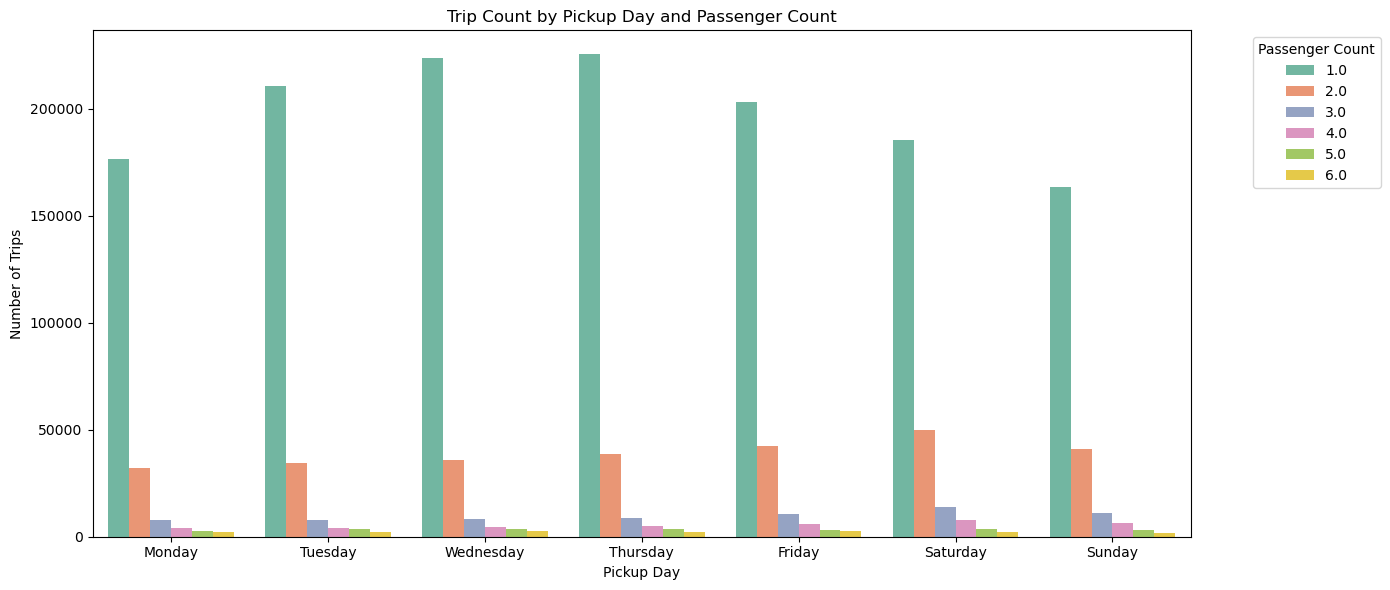

In [129]:
# Visualizing passenger count across Day of week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(14, 6))
sns.barplot(data=passenger_day, x='pickup_day', y='trip_count', hue='passenger_count', palette='Set2', order=ordered_days)
plt.title('Trip Count by Pickup Day and Passenger Count')
plt.xlabel('Pickup Day')
plt.ylabel('Number of Trips')
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Analysis of Passenger count across Hour and Day
1. Solo travellers are way higher that any other category.
2. The trend of decreasing trip count with increasing passenger count holds true for every day and hour. 2-passenger trips (orange bars) are consistently the second most frequent.

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

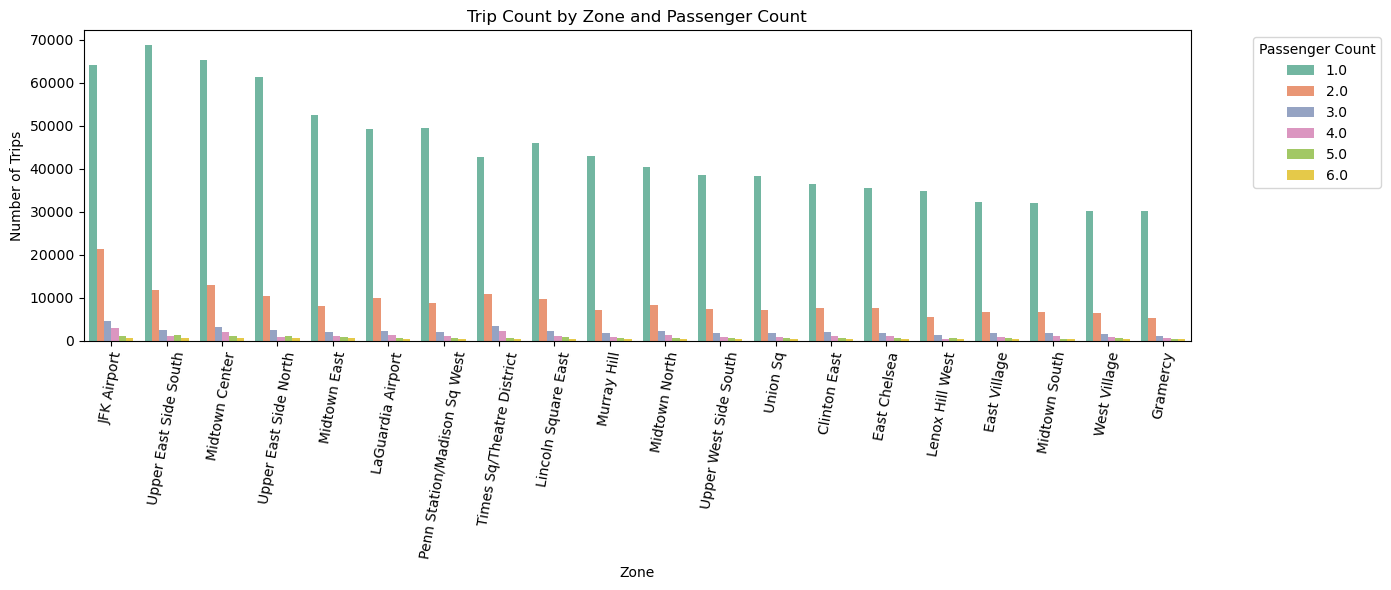

In [130]:
# How does passenger count vary across zones

# From Taxi dataframe, groupby on zone and passenger count
zone_passenger = taxi_merged_df.groupby(['zone', 'passenger_count'], as_index=False).size().rename(columns={'size':'trip_count'})
top20_zone_list = zone_passenger.groupby('zone', as_index=False)['trip_count'].sum().sort_values(by='trip_count', ascending=False).head(20)['zone'].to_list() # Taking top 20 zones
zone_passenger_top20 = zone_passenger[zone_passenger.zone.isin(top20_zone_list)] # Dataframe for plotting. Selected top 20 zones with respect to total trip count

# Plot the data as clustered bar plot for top 20 Zone

plt.figure(figsize=(14, 6))
sns.barplot(data=zone_passenger_top20, x='zone', y='trip_count', hue='passenger_count', palette='Set2', order=top20_zone_list)
plt.title('Trip Count by Zone and Passenger Count')
plt.xlabel('Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=80)
plt.legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [131]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_zone = taxi_merged_df.groupby('zone', as_index=False)['passenger_count'].mean().sort_values(by='passenger_count', ascending=False).rename(columns={'passenger_count':'avg_passenger_count'})
zones_with_trips = zones_with_trips.merge(avg_passenger_zone, on='zone')
top20_zones_avg_passenger = zones_with_trips.sort_values('avg_passenger_count', ascending=False)


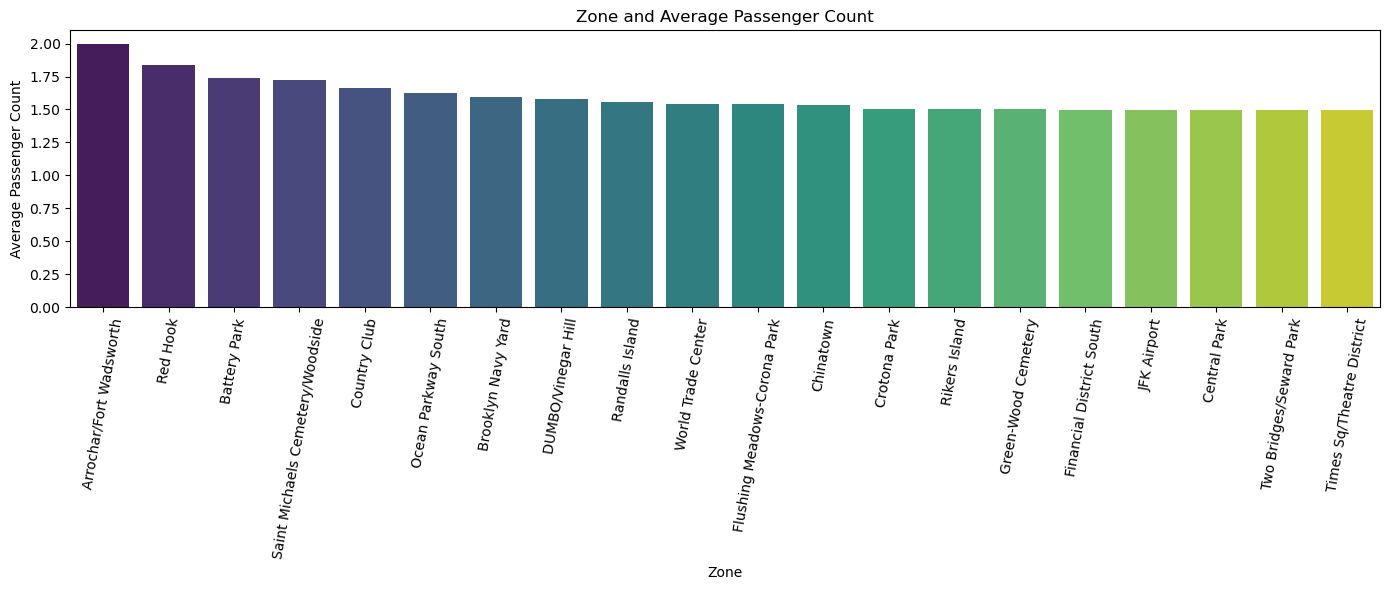

In [132]:
# Plot the data as clustered bar plot for top 20 Zone

plt.figure(figsize=(14, 6))
sns.barplot(data=top20_zones_avg_passenger.head(20), x='zone', y='avg_passenger_count', palette='viridis', order=top20_zones_avg_passenger.head(20).zone.to_list())
plt.title('Zone and Average Passenger Count')
plt.xlabel('Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

Analyse Average Passenger Count across Zones
1. Most of the top 20 zones have average passenger count around 1.5
2. Fort Wadsworth and Red Hook have avg higher passenger count around 2.

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [133]:
# How often is each surcharge applied?

taxi_surcharge_df = taxi_merged_df[(taxi_merged_df.extra > 0)]
taxi_surcharge_df.rename(columns={'zone':'pickup_zone'}, inplace=True)
taxi_surcharge_df.drop('LocationID', axis=1, inplace=True)
taxi_surcharge_df = taxi_surcharge_df.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left').rename(columns={'zone':'dropoff_zone'})
taxi_surcharge_df.drop('LocationID', axis=1, inplace=True)

# Average extra charges by Pickup and Dropoff Zones 
pickup_extra = taxi_surcharge_df.groupby('pickup_zone', as_index=False)['extra'].mean().sort_values(by='extra', ascending=False).rename(columns={'extra':'pickup_extra'})

dropoff_extra = taxi_surcharge_df.groupby('dropoff_zone', as_index=False)['extra'].mean().sort_values(by='extra', ascending=False).rename(columns={'extra':'dropoff_extra'})

zone_extra = pickup_extra.merge(dropoff_extra, left_on='pickup_zone', right_on='dropoff_zone', how='inner')
zone_extra.drop('dropoff_zone', axis=1, inplace=True)
zone_extra.rename(columns = {'pickup_zone':'zone'}, inplace=True)

# Average extra charges by Hour of Day
hourly_extra = taxi_surcharge_df.groupby('pickup_hour', as_index=False)['extra'].mean()

# Average extra charges by Day of week
day_extra = taxi_surcharge_df.groupby('pickup_day', as_index=False)['extra'].mean()


In [134]:
print(f'Pickup zones with high average extra charges \n ')
zone_extra.head(20)

Pickup zones with high average extra charges 
 


,zone,pickup_extra,dropoff_extra
0,LaGuardia Airport,6.365693,5.916797
1,Willets Point,6.250000,3.269231
2,East Elmhurst,5.576173,4.243846
3,Springfield Gardens North,5.000000,2.191612
4,Baisley Park,4.005917,2.110926
5,Saint Michaels Cemetery/Woodside,4.000000,4.527778
6,Rego Park,3.625000,2.853614
7,South Jamaica,3.611538,2.378514
8,Kew Gardens,3.538462,2.876521
9,Randalls Island,3.375000,3.202273


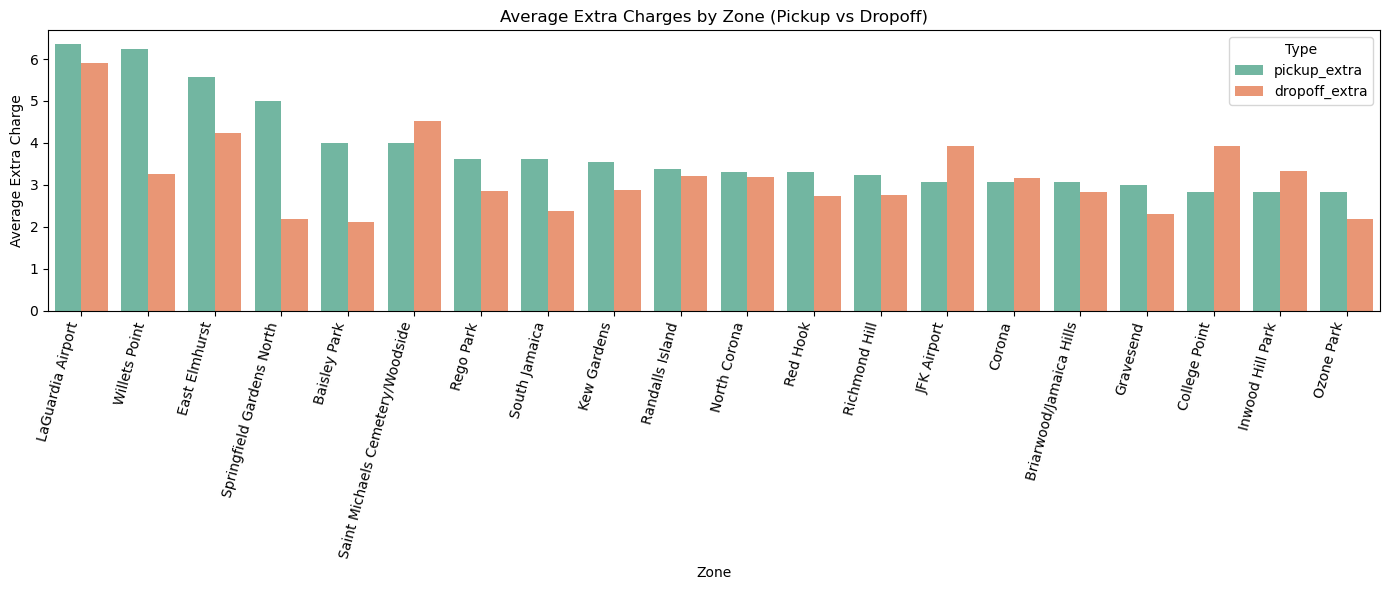

In [135]:
# Visualize the data

# Taking top20 zones for easy plotting
zone_extra_top20 = zone_extra.head(20)

#Convert the data in Long form
zone_extra_melted = zone_extra_top20.melt(id_vars='zone', value_vars=['pickup_extra', 'dropoff_extra'], var_name='Type', value_name='Average Extra')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=zone_extra_melted, x='zone', y='Average Extra', hue='Type', palette='Set2')
plt.xticks(rotation=75, ha='right')
plt.title('Average Extra Charges by Zone (Pickup vs Dropoff)')
plt.xlabel('Zone')
plt.ylabel('Average Extra Charge')
plt.tight_layout()
plt.show()

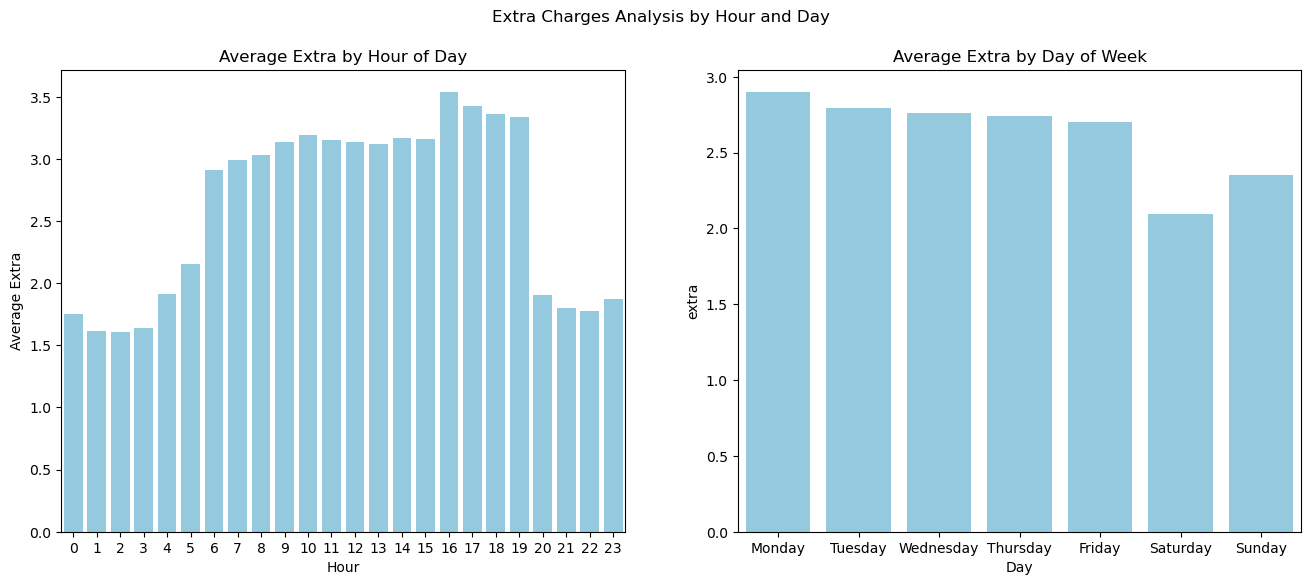

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hourly Extra Charges
sns.barplot( data=hourly_extra, x='pickup_hour', y='extra', ax=axes[0], color='skyblue')
axes[0].set_title('Average Extra by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Average Extra')

# Day-of-week Extra Charges
daylist = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=day_extra, x='pickup_day', y='extra', color='skyblue', order=daylist, ax=axes[1])
axes[1].set_title('Average Extra by Day of Week')
axes[1].set_xlabel('Day')

plt.suptitle('Extra Charges Analysis by Hour and Day')
plt.show()

Analysis for Extra charges 
1. Generally avg extra charges are highest when pickup is at LaGuardia Airport followed by Willets Point.
2. At JFK Airport avg extra charges during drop is higher.
3. Avg Extra charges are quite high during the weekday.
4. During the day 4pm - 7pm avg extra charges are quite high and during the day they are consistent at $3
5. During night time 8pm - 4am, avg Extra charges are way low at $1.5

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Align Driver Availability with Demand Spikes:
- Morning Peak (6–9 AM) and Evening Peak (3–7 PM) show consistently high demand.
- Assign more drivers during these windows to reduce customer wait time. This will help in good customer experience and increased revenue.

2. Reduce Inefficiencies During Lean Hours (2–5 AM):

- Lean hours see significantly fewer trips. 
- Reduce fleet volume and assign drivers to standby near known hotspots (e.g., airports or night party zones).

3. Minimize Slow Routes with Historical Data:

- Analyze slowest routes per hour
- Avoid dispatching drivers through congested zones

4. Route Optimization:

- Integrate route suggestion tools in dispatch systems that dynamically account for speed trends by time of day.
- Flag zones with average speeds < 0.2 mph during dispatch to minimize inefficiencies.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. High-Demand Pickup Zones:

- Position cabs near JFK Airport, LaGuardia, Midtown, Upper East Side, Penn Station, and Times Square, especially during rush hours and late evenings (11 PM–2 AM).
- These zones consistently appear in both day and night high-demand lists.
- Incentivise drivers to position their taxis in higher zones.

2. Night-Time Strategy (11 PM–5 AM):

- Zones like East Village, Clinton East, West Village show high activity at night — keep a night-shift fleet allocated here.
- These trips are often shorter but may include higher tips as indicated by Tip data analysis. It will help in revenue increase and happy drivers.
- Incentivise drivers for night time trips on these zones.

3. Seasonality Positioning:

- During Spring (Mar-May) and October (Fall), demand rises — increase cab availability near tourist hubs and central Manhattan.
- Consider scaling up operations in May and October to handle revenue spikes.
- Give discount coupons of limited validity of 15 days at end of rides during months June-Sep, to increase revenue.

4. Weekend Planning:

- While overall trip volume drops, nightlife zones see increased demand during weekend late nights. Position cabs accordingly.

5. Low-Demand Zones:

- Minimize idle cab presence in zones with consistently low trip counts.
- Give offers to customers to increase customer footprint.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Adjust Fare Per Mile Dynamically:

- Data shows high average fare per mile during 4–5 AM and on Sundays.
- Implement a dynamic pricing model.

2. Leverage Tip Behavior in Pricing:

- Passengers tend to tip more for short rides and during 4 PM–3 AM.
- Introduce a “convenience fee” during high-tip hours or offer premium short-trip service tiers.

3. Promote Vendor Differentiation:

- Vendor 2 (VeriFone Inc.) fares higher on short trips; consider standardizing per-mile charges to reduce discrepancies.
- Introduce loyalty programs or discounts during off-peak hours to retain customers.

4. Optimize Pricing for Underperforming Months (e.g., Feb, Aug):

- Use discounts coupons with short validity or offers to stimulate usage.
- Consider fare waivers during low-demand hours to encourage ridership.

5. Encourage Credit Card Payments

- Partner with Credit card providers for exclusive rates and facilities.
- Offer discount on fare amount if payment is by credit card.